# Business Case : Delhivery Feature Engineering

# About Delhivery

 Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.
 The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181')

In [4]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


## Defining Problem Statement


In this project, the goal is to perform a comprehensive exploratory data analysis (EDA) and conduct feature engineering on a dataset containing trip information. The dataset contains details about trips, including source and destination information, trip creation time, travel durations, distances, and other attributes.

Objective:
The primary objective of this project is to gain insights from the provided trip dataset through extensive data cleaning, exploration, and feature engineering. By analyzing the dataset and creating meaningful features, we aim to better understand various aspects of the trips, identify patterns, outliers, and relationships between different variables. This analysis will provide valuable information for decision-making, improving services, and understanding user behavior.

Concept Used:

Feature Creation,
Relationship between Features,
Column Normalization /Column Standardization,
Handling categorical values,
Missing values - Outlier treatment / Types of outliers


##  Basic data exploration and cleaning

In [5]:
# Shape of data
df.shape

(144867, 24)

In [6]:
# Info about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [7]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [8]:
# Dropping unknown fields 

unknown_fields=['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor']

df.drop(columns=unknown_fields,inplace=True)

In [9]:
# Unique values in each field

for i in df.columns:
    print(f"No. of unique values in column {i:<30} : {df[i].nunique()}")

No. of unique values in column data                           : 2
No. of unique values in column trip_creation_time             : 14817
No. of unique values in column route_schedule_uuid            : 1504
No. of unique values in column route_type                     : 2
No. of unique values in column trip_uuid                      : 14817
No. of unique values in column source_center                  : 1508
No. of unique values in column source_name                    : 1498
No. of unique values in column destination_center             : 1481
No. of unique values in column destination_name               : 1468
No. of unique values in column od_start_time                  : 26369
No. of unique values in column od_end_time                    : 26369
No. of unique values in column start_scan_to_end_scan         : 1915
No. of unique values in column actual_distance_to_destination : 144515
No. of unique values in column actual_time                    : 3182
No. of unique values in column osr

In [10]:
# Converting those columns into categories which have only two unique entries

l=['data','route_type']

for i in l:
    df[i]=df[i].astype('category')

In [11]:
# Converting time columns into date-time

date_time_cols = ['trip_creation_time','od_start_time','od_end_time']
for i in date_time_cols:
    df[i]= pd.to_datetime(df[i])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

## Looking for missing values

In [13]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

In [14]:
missing_source_name = df[df['source_name'].isna()]['source_center'].unique()
missing_source_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [15]:
for i in missing_source_name:
    unique_source_name= df[df['source_center']==i]['source_name'].unique()
    if pd.isna(unique_source_name):
        print('For Source_center ',i,' '*10,'Source_name : Not Found')
    else:
        print(unique_source_name)

For Source_center  IND342902A1B            Source_name : Not Found
For Source_center  IND577116AAA            Source_name : Not Found
For Source_center  IND282002AAD            Source_name : Not Found
For Source_center  IND465333A1B            Source_name : Not Found
For Source_center  IND841301AAC            Source_name : Not Found
For Source_center  IND509103AAC            Source_name : Not Found
For Source_center  IND126116AAA            Source_name : Not Found
For Source_center  IND331022A1B            Source_name : Not Found
For Source_center  IND505326AAB            Source_name : Not Found
For Source_center  IND852118A1B            Source_name : Not Found


In [16]:
missing_dest_center = df[df['destination_name'].isna()]['destination_center'].unique()
missing_dest_center

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [17]:
for i in missing_dest_center:
    unique_dest_name = df[df['destination_center']==i]['destination_name'].unique()
    if pd.isna(unique_dest_name):
        print('For Destination Center :',i,' '*10,'Destination_name : Not Found')
    else:
        print('For Destination Center :',i,' '*10,'Destination_name : ',unique_dest_name)

For Destination Center : IND342902A1B            Destination_name : Not Found
For Destination Center : IND577116AAA            Destination_name : Not Found
For Destination Center : IND282002AAD            Destination_name : Not Found
For Destination Center : IND465333A1B            Destination_name : Not Found
For Destination Center : IND841301AAC            Destination_name : Not Found
For Destination Center : IND505326AAB            Destination_name : Not Found
For Destination Center : IND852118A1B            Destination_name : Not Found
For Destination Center : IND126116AAA            Destination_name : Not Found
For Destination Center : IND509103AAC            Destination_name : Not Found
For Destination Center : IND221005A1A            Destination_name : Not Found
For Destination Center : IND250002AAC            Destination_name : Not Found
For Destination Center : IND331001A1C            Destination_name : Not Found
For Destination Center : IND122015AAC            Destination_nam

## Treating Missing Values

In [18]:
df['source_name'] = df['source_name'].fillna('Unknown_source_name')
df['destination_name']= df['destination_name'].fillna('Unknown_destination_name')

In [19]:
for i in df.columns.unique():
    print(f"Percentage of null values in column {i} : {df[i].isna().mean()*100}%")

Percentage of null values in column data : 0.0%
Percentage of null values in column trip_creation_time : 0.0%
Percentage of null values in column route_schedule_uuid : 0.0%
Percentage of null values in column route_type : 0.0%
Percentage of null values in column trip_uuid : 0.0%
Percentage of null values in column source_center : 0.0%
Percentage of null values in column source_name : 0.0%
Percentage of null values in column destination_center : 0.0%
Percentage of null values in column destination_name : 0.0%
Percentage of null values in column od_start_time : 0.0%
Percentage of null values in column od_end_time : 0.0%
Percentage of null values in column start_scan_to_end_scan : 0.0%
Percentage of null values in column actual_distance_to_destination : 0.0%
Percentage of null values in column actual_time : 0.0%
Percentage of null values in column osrm_time : 0.0%
Percentage of null values in column osrm_distance : 0.0%
Percentage of null values in column segment_actual_time : 0.0%
Percen

## Statistical Summary

In [20]:
df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000
mean,961.262986,234.073372,416.927527,213.868272,284.771297,36.196111,18.507548,22.82902
std,1037.012769,344.990009,598.103621,308.011085,421.119294,53.571158,14.775960,17.86066
min,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.00000
25%,161.000000,23.355874,51.000000,27.000000,29.914700,20.000000,11.000000,12.07010
50%,449.000000,66.126571,132.000000,64.000000,78.525800,29.000000,17.000000,23.51300
75%,1634.000000,286.708875,513.000000,257.000000,343.193250,40.000000,22.000000,27.81325
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.40370


In [21]:
df.describe(include='object')

,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name
count,144867,144867,144867,144867,144867,144867
unique,1504,14817,1508,1499,1481,1469
top,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,1812,101,23347,23347,15192,15192


## Merging of rows and aggregation of field

In [22]:
grouping_1 = ['trip_uuid', 'source_center', 'destination_center']
df1 = df.groupby(by = grouping_1, as_index = False).agg({'data' : 'first',
                                                         'route_type' : 'first',
                                                       'trip_creation_time' : 'first',
                                                       'source_name' : 'first',
                                                       'destination_name' : 'last',
                                                       'od_start_time' : 'first',
                                                       'od_end_time' : 'first',
                                                       'start_scan_to_end_scan' : 'first',
                                                       'actual_distance_to_destination' : 'last',
                                                       'actual_time' : 'last',
                                                       'osrm_time' : 'last',
                                                       'osrm_distance' : 'last',
                                                       'segment_actual_time' : 'sum',
                                                       'segment_osrm_time' : 'sum',
                                                       'segment_osrm_distance' : 'sum'})
df1

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
26366,trip-153861118270144424,IND583119AAA,IND583101AAA,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303


## Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required

In [23]:
df1['od_total_time'] = df1['od_end_time'] - df1['od_start_time']

In [24]:
df1.drop(columns =['od_end_time','od_start_time'],inplace=True)
df1['od_total_time'] = df1['od_total_time'].apply(lambda x: round(x.total_seconds()/60.0,2))
df1['od_total_time'].head()

0    1260.60
1     999.51
2      58.83
3     122.78
4     834.64
Name: od_total_time, dtype: float64

In [25]:
df2 = df1.groupby(by = 'trip_uuid', as_index = False).agg({'source_center' : 'first',
                                                           'destination_center' : 'last',
                                                           'data' : 'first',
                                                           'route_type' : 'first',
                                                           'trip_creation_time' : 'first',
                                                           'source_name' : 'first',
                                                           'destination_name' : 'last',
                                                           'od_total_time' : 'sum',
                                                           'start_scan_to_end_scan' : 'sum',
                                                           'actual_distance_to_destination' : 'sum',
                                                           'actual_time' : 'sum',
                                                           'osrm_time' : 'sum',
                                                           'osrm_distance' : 'sum',
                                                           'segment_actual_time' : 'sum',
                                                           'segment_osrm_time' : 'sum',
                                                           'segment_osrm_distance' : 'sum'})
df2

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,IND160002AAC,IND160002AAC,test,Carting,2018-10-03 23:55:56.258533,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),258.03,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551
14813,trip-153861104386292051,IND121004AAB,IND121004AAA,test,Carting,2018-10-03 23:57:23.863155,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),60.59,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
14814,trip-153861106442901555,IND208006AAA,IND208006AAA,test,Carting,2018-10-03 23:57:44.429324,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),422.12,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866
14815,trip-153861115439069069,IND627005AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),348.52,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324


## Build some features to prepare the data for actual analysis. Extract features from the below fields:
## Source Name: Split and extract features out of destination. City-place-code (State)

In [26]:
def location_name_to_state(x):
    l = x.split('(')
    if len(l) == 1:
        return l[0]
    else:
        return l[1].replace(')', "")

In [27]:
def location_name_to_city(x):
    if 'location' in x:
        return 'unknown_city'
    else:
        l = x.split()[0].split('_')
        if 'CCU' in x:
            return 'Kolkata'
        elif 'MAA' in x.upper():
            return 'Chennai'
        elif ('HBR' in x.upper()) or ('BLR' in x.upper()):
            return 'Bengaluru'
        elif 'FBD' in x.upper():
            return 'Faridabad'
        elif 'BOM' in x.upper():
            return 'Mumbai'
        elif 'DEL' in x.upper():
            return 'Delhi'
        elif 'OK' in x.upper():
            return 'Delhi'
        elif 'GZB' in x.upper():
            return 'Ghaziabad'
        elif 'GGN' in x.upper():
            return 'Gurgaon'
        elif 'AMD' in x.upper():
            return 'Ahmedabad'
        elif 'CJB' in x.upper():
            return 'Coimbatore'
        elif 'HYD' in x.upper():
            return 'Hyderabad'
        return l[0]

In [28]:
def location_name_to_place(x):
    if 'location' in x:
        return x
    elif 'HBR' in x:
        return 'HBR Layout PC'
    else:
        l = x.split()[0].split('_', 1)
        if len(l) == 1:
            return 'unknown_place'
        else:
            return l[1]

In [29]:
df2['source_state'] = df2['source_name'].apply(location_name_to_state)
df2['source_state'].unique()

array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Assam', 'Madhya Pradesh', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Goa', 'Jharkhand', 'Pondicherry',
       'Orissa', 'Uttarakhand', 'Himachal Pradesh', 'Kerala',
       'Arunachal Pradesh', 'Bihar', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Jammu & Kashmir', 'Mizoram', 'Nagaland',
       'Unknown_source_name'], dtype=object)

In [30]:
df2['source_city'] = df2['source_name'].apply(location_name_to_city)
print('No of source cities :', df2['source_city'].nunique())
df2['source_city'].unique()[:100]

No of source cities : 690


array(['Kanpur', 'Doddablpur', 'Gurgaon', 'Mumbai', 'Bellary', 'Chennai',
       'Bengaluru', 'Surat', 'Delhi', 'Pune', 'Faridabad', 'Shirala',
       'Hyderabad', 'Thirumalagiri', 'Gulbarga', 'Jaipur', 'Allahabad',
       'Guwahati', 'Narsinghpur', 'Shrirampur', 'Madakasira', 'Sonari',
       'Dindigul', 'Jalandhar', 'Chandigarh', 'Deoli', 'Pandharpur',
       'Kolkata', 'Bhandara', 'Kurnool', 'Bhiwandi', 'Bhatinda',
       'RoopNagar', 'Bantwal', 'Lalru', 'Kadi', 'Shahdol', 'Gangakher',
       'Durgapur', 'Vapi', 'Jamjodhpur', 'Jetpur', 'Mehsana', 'Jabalpur',
       'Junagadh', 'Gundlupet', 'Mysore', 'Goa', 'Bhopal', 'Sonipat',
       'Himmatnagar', 'Jamshedpur', 'Pondicherry', 'Anand', 'Udgir',
       'Nadiad', 'Villupuram', 'Purulia', 'Bhubaneshwar', 'Bamangola',
       'Tiruppattur', 'Kotdwara', 'Medak', 'Bangalore', 'Dhrangadhra',
       'Hospet', 'Ghumarwin', 'Agra', 'Sitapur', 'Canacona', 'Bilimora',
       'SultnBthry', 'Lucknow', 'Vellore', 'Bhuj', 'Dinhata',
       'Margheri

In [31]:
df2['source_place'] = df2['source_name'].apply(location_name_to_place)
df2['source_place'].unique()[:100]

array(['Central_H_6', 'ChikaDPP_D', 'Bilaspur_HB', 'unknown_place', 'Dc',
       'Poonamallee', 'Chrompet_DPC', 'HBR Layout PC', 'Central_D_12',
       'Lajpat_IP', 'North_D_3', 'Balabhgarh_DPC', 'Central_DPP_3',
       'Shamshbd_H', 'Xroad_D', 'Nehrugnj_I', 'Central_I_7',
       'Central_H_1', 'Nangli_IP', 'North', 'KndliDPP_D', 'Central_D_9',
       'DavkharRd_D', 'Bandel_D', 'RTCStand_D', 'Central_DPP_1',
       'KGAirprt_HB', 'North_D_2', 'Central_D_1', 'DC', 'Mthurard_L',
       'Mullanpr_DC', 'Central_DPP_2', 'RajCmplx_D', 'Beliaghata_DPC',
       'RjnaiDPP_D', 'AbbasNgr_I', 'Mankoli_HB', 'DPC', 'Airport_H',
       'Hub', 'Gateway_HB', 'Tathawde_H', 'ChotiHvl_DC', 'Trmltmpl_D',
       'OnkarDPP_D', 'Mehmdpur_H', 'KaranNGR_D', 'Sohagpur_D',
       'Chrompet_L', 'Busstand_D', 'Central_I_1', 'IndEstat_I', 'Court_D',
       'Panchot_IP', 'Adhartal_IP', 'DumDum_DPC', 'Bomsndra_HB',
       'Swamylyt_D', 'Yadvgiri_IP', 'Old', 'Kundli_H', 'Central_I_3',
       'Vasanthm_I', 'Poonamallee_

## Destination Name: Split and extract features out of destination. City-place-code (State)

In [32]:
df2['destination_state'] = df2['destination_name'].apply(location_name_to_state)
df2['destination_state'].head(10)

0    Uttar Pradesh
1        Karnataka
2          Haryana
3      Maharashtra
4        Karnataka
5       Tamil Nadu
6       Tamil Nadu
7        Karnataka
8          Gujarat
9            Delhi
Name: destination_state, dtype: object

In [33]:
df2['destination_city'] = df2['destination_name'].apply(location_name_to_city)
df2['destination_city'].head()

0        Kanpur
1    Doddablpur
2       Gurgaon
3        Mumbai
4        Sandur
Name: destination_city, dtype: object

In [34]:
df2['destination_place'] = df2['destination_name'].apply(location_name_to_place)
df2['destination_place'].head()

0    Central_H_6
1     ChikaDPP_D
2    Bilaspur_HB
3      MiraRd_IP
4     WrdN1DPP_D
Name: destination_place, dtype: object

## Trip_creation_time: Extract features like month, year and day etc

In [35]:
df2['trip_creation_date'] = pd.to_datetime(df2['trip_creation_time'].dt.date)
df2['trip_creation_date'].head()

0   2018-09-12
1   2018-09-12
2   2018-09-12
3   2018-09-12
4   2018-09-12
Name: trip_creation_date, dtype: datetime64[ns]

In [36]:
df2['trip_creation_day'] = df2['trip_creation_time'].dt.day
df2['trip_creation_day'] = df2['trip_creation_day'].astype('int8')
df2['trip_creation_day'].head()

0    12
1    12
2    12
3    12
4    12
Name: trip_creation_day, dtype: int8

In [37]:
df2['trip_creation_month'] = df2['trip_creation_time'].dt.month
df2['trip_creation_month'] = df2['trip_creation_month'].astype('int8')
df2['trip_creation_month'].head()

0    9
1    9
2    9
3    9
4    9
Name: trip_creation_month, dtype: int8

In [38]:
df2['trip_creation_year'] = df2['trip_creation_time'].dt.year
df2['trip_creation_year'] = df2['trip_creation_year'].astype('int16')
df2['trip_creation_year'].head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: trip_creation_year, dtype: int16

In [39]:
df2['trip_creation_week'] = df2['trip_creation_time'].dt.isocalendar().week
df2['trip_creation_week'] = df2['trip_creation_week'].astype('int8')
df2['trip_creation_week'].head()

0    37
1    37
2    37
3    37
4    37
Name: trip_creation_week, dtype: int8

In [40]:
df2['trip_creation_hour'] = df2['trip_creation_time'].dt.hour
df2['trip_creation_hour'] = df2['trip_creation_hour'].astype('int8')
df2['trip_creation_hour'].head()

0    0
1    0
2    0
3    0
4    0
Name: trip_creation_hour, dtype: int8

## Data cleaned. Finding the structure of data after data cleaning

In [41]:
df2.shape

(14817, 29)

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   source_center                   14817 non-null  object        
 2   destination_center              14817 non-null  object        
 3   data                            14817 non-null  category      
 4   route_type                      14817 non-null  category      
 5   trip_creation_time              14817 non-null  datetime64[ns]
 6   source_name                     14817 non-null  object        
 7   destination_name                14817 non-null  object        
 8   od_total_time                   14817 non-null  float64       
 9   start_scan_to_end_scan          14817 non-null  float64       
 10  actual_distance_to_destination  14817 non-null  float64       
 11  ac

In [43]:
df2.describe()

,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_week,trip_creation_hour
count,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.0,14817.000000,14817.000000
mean,531.697630,530.810016,164.477838,357.143754,161.384018,204.344689,353.892286,180.949787,223.201161,18.370790,9.120672,2018.0,38.295944,12.449821
std,658.868223,658.705957,305.388147,561.396157,271.360995,370.395573,556.247965,314.542047,416.628374,7.893275,0.325757,0.0,0.967872,7.986553
min,23.460000,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900,1.000000,9.000000,2018.0,37.000000,0.000000
25%,149.930000,149.000000,22.837239,67.000000,29.000000,30.819200,66.000000,31.000000,32.654500,14.000000,9.000000,2018.0,38.000000,4.000000
50%,280.770000,280.000000,48.474072,149.000000,60.000000,65.618800,147.000000,65.000000,70.154400,19.000000,9.000000,2018.0,38.000000,14.000000
75%,638.200000,637.000000,164.583208,370.000000,168.000000,208.475000,367.000000,185.000000,218.802400,25.000000,9.000000,2018.0,39.000000,20.000000
max,7898.550000,7898.000000,2186.531787,6265.000000,2032.000000,2840.081000,6230.000000,2564.000000,3523.632400,30.000000,10.000000,2018.0,40.000000,23.000000


In [44]:
df2.describe(include='object').T

,count,unique,top,freq
trip_uuid,14817,14817,trip-153671041653548748,1
source_center,14817,938,IND000000ACB,1063
destination_center,14817,1042,IND000000ACB,821
source_name,14817,934,Gurgaon_Bilaspur_HB (Haryana),1063
destination_name,14817,1035,Gurgaon_Bilaspur_HB (Haryana),821
source_state,14817,30,Maharashtra,2714
source_city,14817,690,Mumbai,1442
source_place,14817,757,Bilaspur_HB,1063
destination_state,14817,32,Maharashtra,2561
destination_city,14817,806,Mumbai,1548


## Visual Analysis 

### How many trips created on hourly basis

In [45]:
df2['trip_creation_hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int8)

In [46]:
df_hour = df2.groupby('trip_creation_hour')['trip_uuid'].count().to_frame().reset_index()
df_hour

,trip_creation_hour,trip_uuid
0,0,994
1,1,750
2,2,702
3,3,652
4,4,636
5,5,509
6,6,611
7,7,473
8,8,346
9,9,324


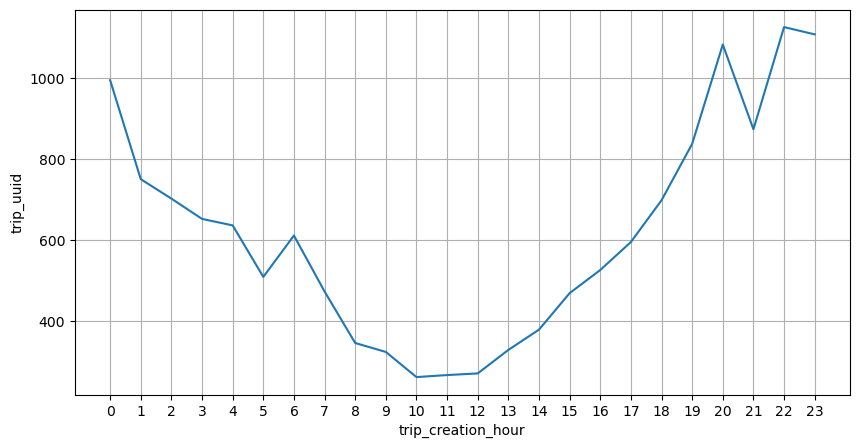

In [47]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_hour,x='trip_creation_hour',y='trip_uuid')
plt.xticks(np.arange(0,24))
plt.grid('both')
plt.show()

### How many trips are created for different days of the month

In [48]:
df_days = df2.groupby('trip_creation_day')['trip_uuid'].count().to_frame().reset_index()
df_days.head()

,trip_creation_day,trip_uuid
0,1,605
1,2,552
2,3,631
3,12,747
4,13,750


In [49]:
df_days['trip_creation_day'].unique()

array([ 1,  2,  3, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30], dtype=int64)

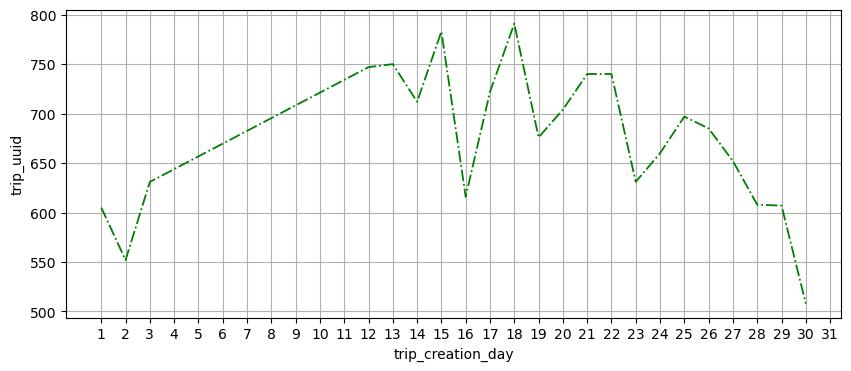

In [50]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_days,x='trip_creation_day',y='trip_uuid',color='green',ls='-.',lw=1.3)
plt.xticks(np.arange(1,32))
plt.grid('both')
plt.show()

### How many trips created for different weeks

In [51]:
df_week = df2.groupby('trip_creation_week')['trip_uuid'].count().to_frame().reset_index()
df_week.head()

,trip_creation_week,trip_uuid
0,37,3608
1,38,5004
2,39,4417
3,40,1788


In [52]:
df_week['trip_creation_week'].unique()

array([37, 38, 39, 40], dtype=int64)

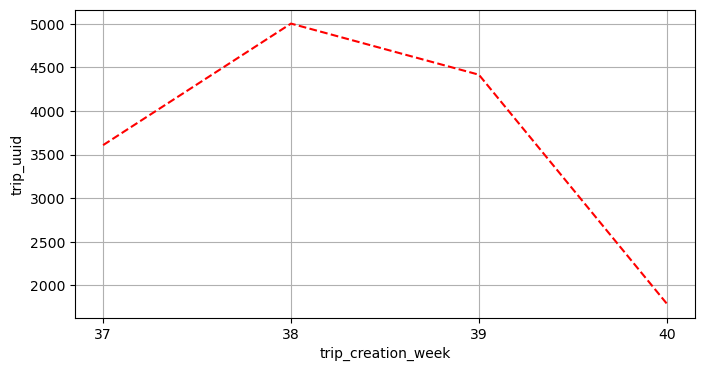

In [53]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df_week,x='trip_creation_week',y='trip_uuid',color='red',ls='--')
plt.xticks(np.arange(37,41))
plt.grid('both')
plt.show()

### How many trips created in months

In [54]:
df_month = df2.groupby('trip_creation_month')['trip_uuid'].count().to_frame().reset_index()
df_month.head()

,trip_creation_month,trip_uuid
0,9,13029
1,10,1788


In [55]:
df_month['perc'] = np.round(100*df_month['trip_uuid']/df_month['trip_uuid'].sum(),2)
df_month

,trip_creation_month,trip_uuid,perc
0,9,13029,87.93
1,10,1788,12.07


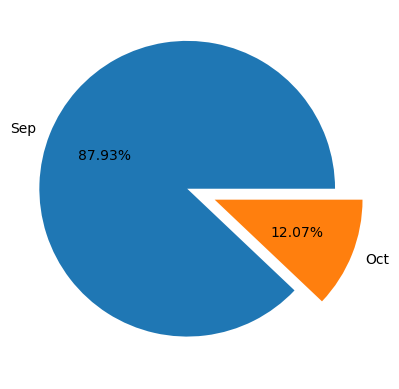

In [56]:
plt.pie(x=df_month['perc'],labels=['Sep','Oct'],autopct='%.2f%%',explode=[0.1,0.1])
plt.show()

### How trip data is distributed

In [57]:
df_data =df2.groupby('data')['trip_uuid'].count().to_frame().reset_index()
df_data.head()

,data,trip_uuid
0,test,4163
1,training,10654


In [58]:
df_data['perc'] = np.round(100*df_data['trip_uuid']/df_data['trip_uuid'].sum(),2)
df_data

,data,trip_uuid,perc
0,test,4163,28.1
1,training,10654,71.9


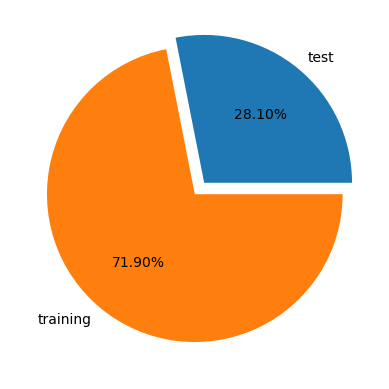

In [59]:
plt.pie(x=df_data['perc'],labels=['test','training'],autopct='%.2f%%',explode=[0.1,0])
plt.show()

### What is the distribution of route types

In [60]:
df_route_type = df2.groupby('route_type')['trip_uuid'].count().to_frame().reset_index()
df_route_type.head()

,route_type,trip_uuid
0,Carting,8908
1,FTL,5909


In [61]:
df_route_type['perc']= np.round(100*df_route_type['trip_uuid']/df_route_type['trip_uuid'].sum(),2)
df_route_type

,route_type,trip_uuid,perc
0,Carting,8908,60.12
1,FTL,5909,39.88


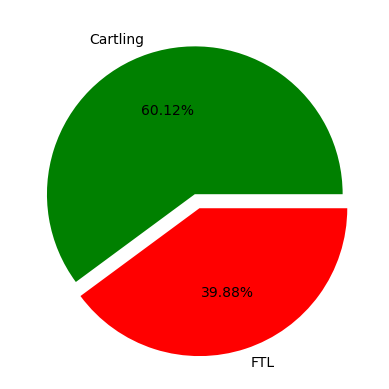

In [62]:
plt.pie(x=df_route_type['perc'],labels=['Cartling','FTL'],autopct='%.2f%%',explode=[0,0.1],colors='green')
plt.show()


### Distribution of trips in different states

In [63]:
df2.columns

Index(['trip_uuid', 'source_center', 'destination_center', 'data',
       'route_type', 'trip_creation_time', 'source_name', 'destination_name',
       'od_total_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'source_state', 'source_city', 'source_place',
       'destination_state', 'destination_city', 'destination_place',
       'trip_creation_date', 'trip_creation_day', 'trip_creation_month',
       'trip_creation_year', 'trip_creation_week', 'trip_creation_hour'],
      dtype='object')

In [64]:
df_source_state = df2.groupby('source_state')['trip_uuid'].count().to_frame().reset_index()
df_source_state = df_source_state.sort_values(by=['trip_uuid'],ascending=False)
df_source_state.head()

,source_state,trip_uuid
17,Maharashtra,2714
14,Karnataka,2143
10,Haryana,1838
24,Tamil Nadu,1039
25,Telangana,781


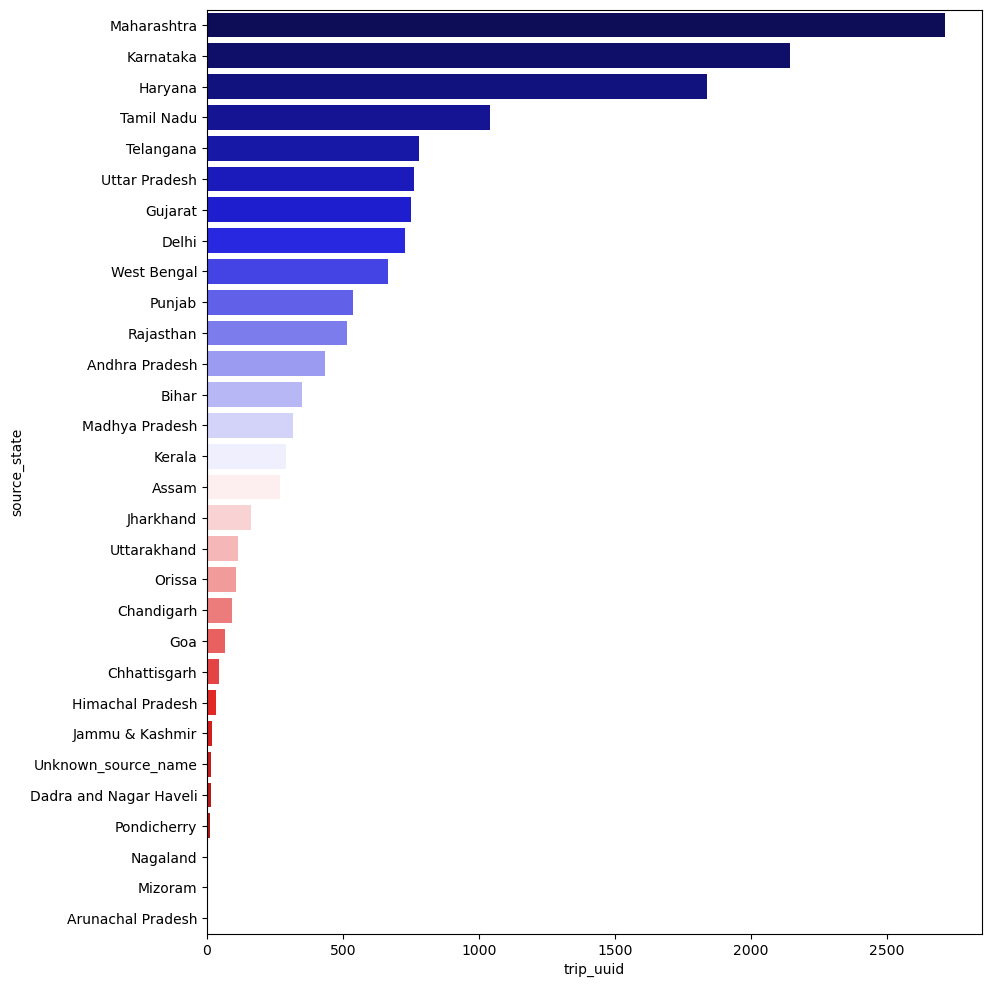

In [65]:
plt.figure(figsize=(10,12))
sns.barplot(data=df_source_state,x='trip_uuid',y='source_state',palette='seismic')
plt.show()

### Top 30 cities according to no. of trips 

In [66]:
df_source_city = df2.groupby('source_city')['trip_uuid'].count().to_frame().reset_index()
df_source_city = df_source_city.sort_values(by=['trip_uuid'],ascending=False)
df_source_city.head()

,source_city,trip_uuid
439,Mumbai,1442
237,Gurgaon,1165
169,Delhi,883
79,Bengaluru,726
100,Bhiwandi,697


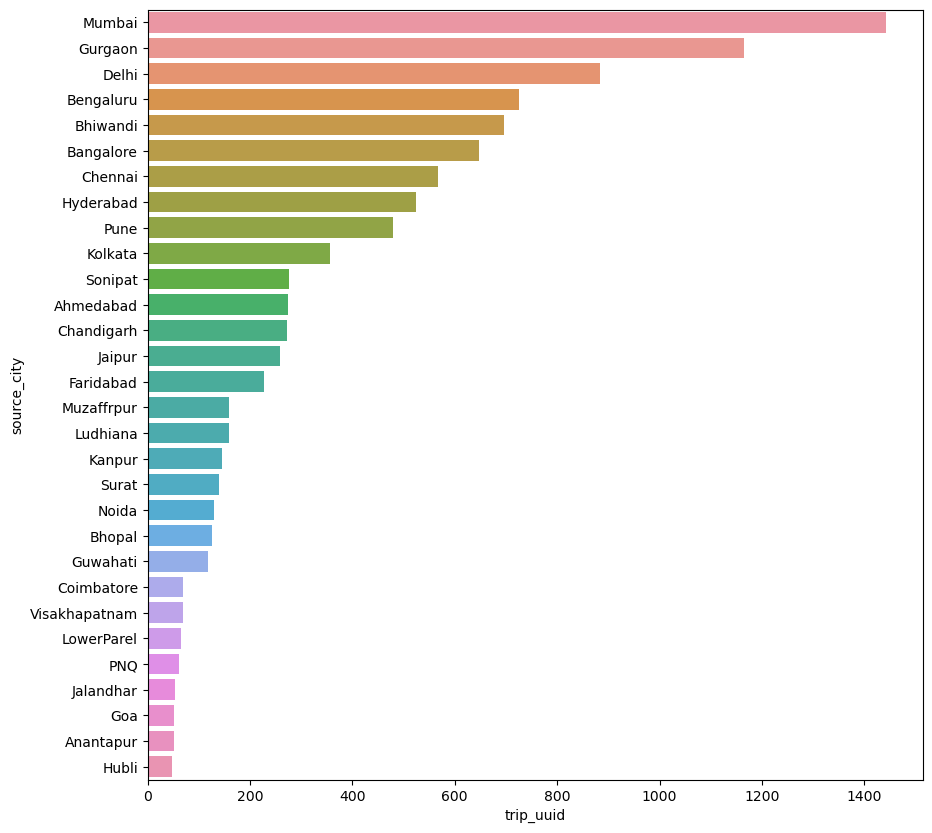

In [67]:
plt.figure(figsize=(10,10))
sns.barplot(data=df_source_city[:30],y='source_city',x='trip_uuid')
plt.show()

### Top 30 Destination State according to no. of trips

In [68]:
df_destination_state = df2.groupby('destination_state')['trip_uuid'].count().to_frame().reset_index()
df_destination_state = df_destination_state.sort_values(by=['trip_uuid'],ascending=False)
df_destination_state.head()

,destination_state,trip_uuid
18,Maharashtra,2561
15,Karnataka,2294
11,Haryana,1643
25,Tamil Nadu,1084
29,Uttar Pradesh,811


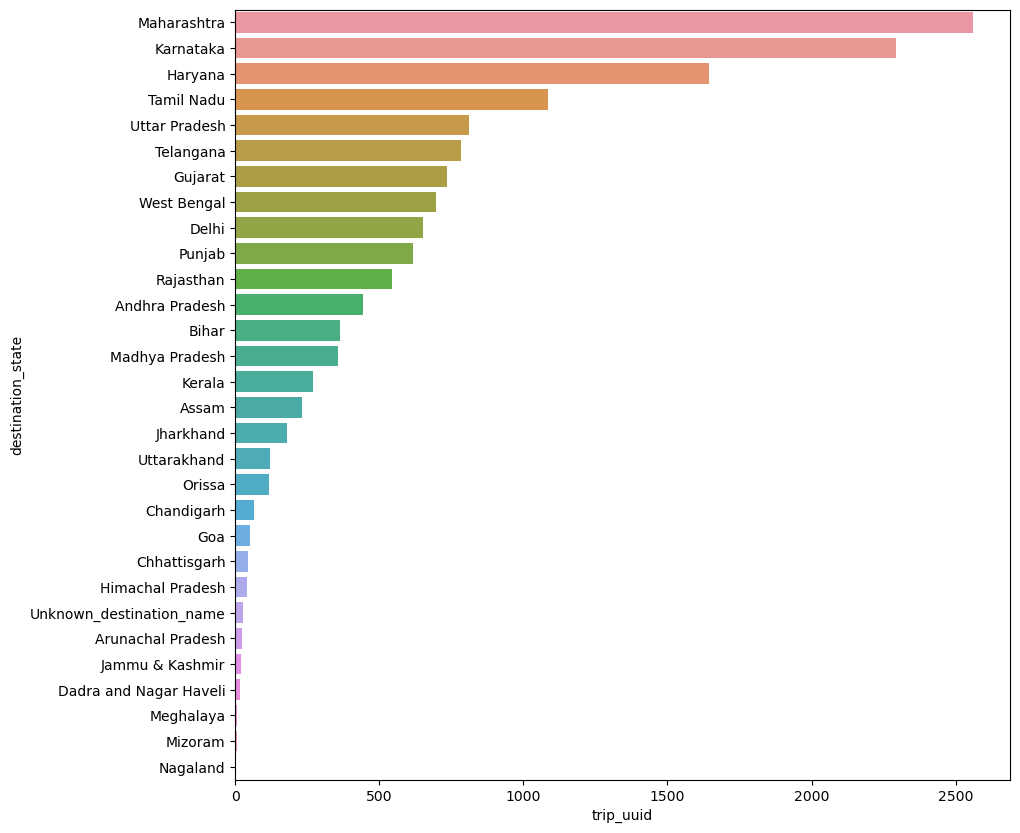

In [69]:
plt.figure(figsize=(10,10))
sns.barplot(data=df_destination_state[:30],y='destination_state',x='trip_uuid')
plt.show()

### Top 30 Destination Cities

In [70]:
df_destination_city = df2.groupby('destination_city')['trip_uuid'].count().to_frame().reset_index()
df_destination_city = df_destination_city.sort_values(by=['trip_uuid'],ascending=False)
df_destination_city.head()

,destination_city,trip_uuid
515,Mumbai,1548
96,Bengaluru,975
282,Gurgaon,936
200,Delhi,778
163,Chennai,595


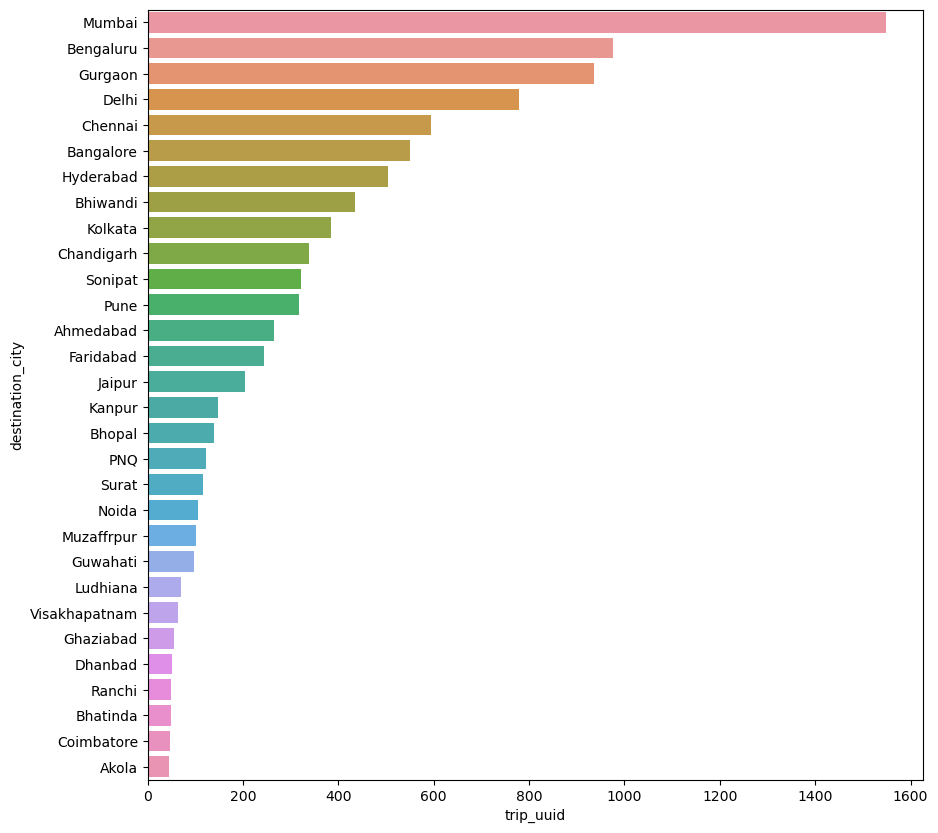

In [71]:
plt.figure(figsize=(10,10))
sns.barplot(data=df_destination_city[:30],y='destination_city',x='trip_uuid')
plt.show()

## Pairplot

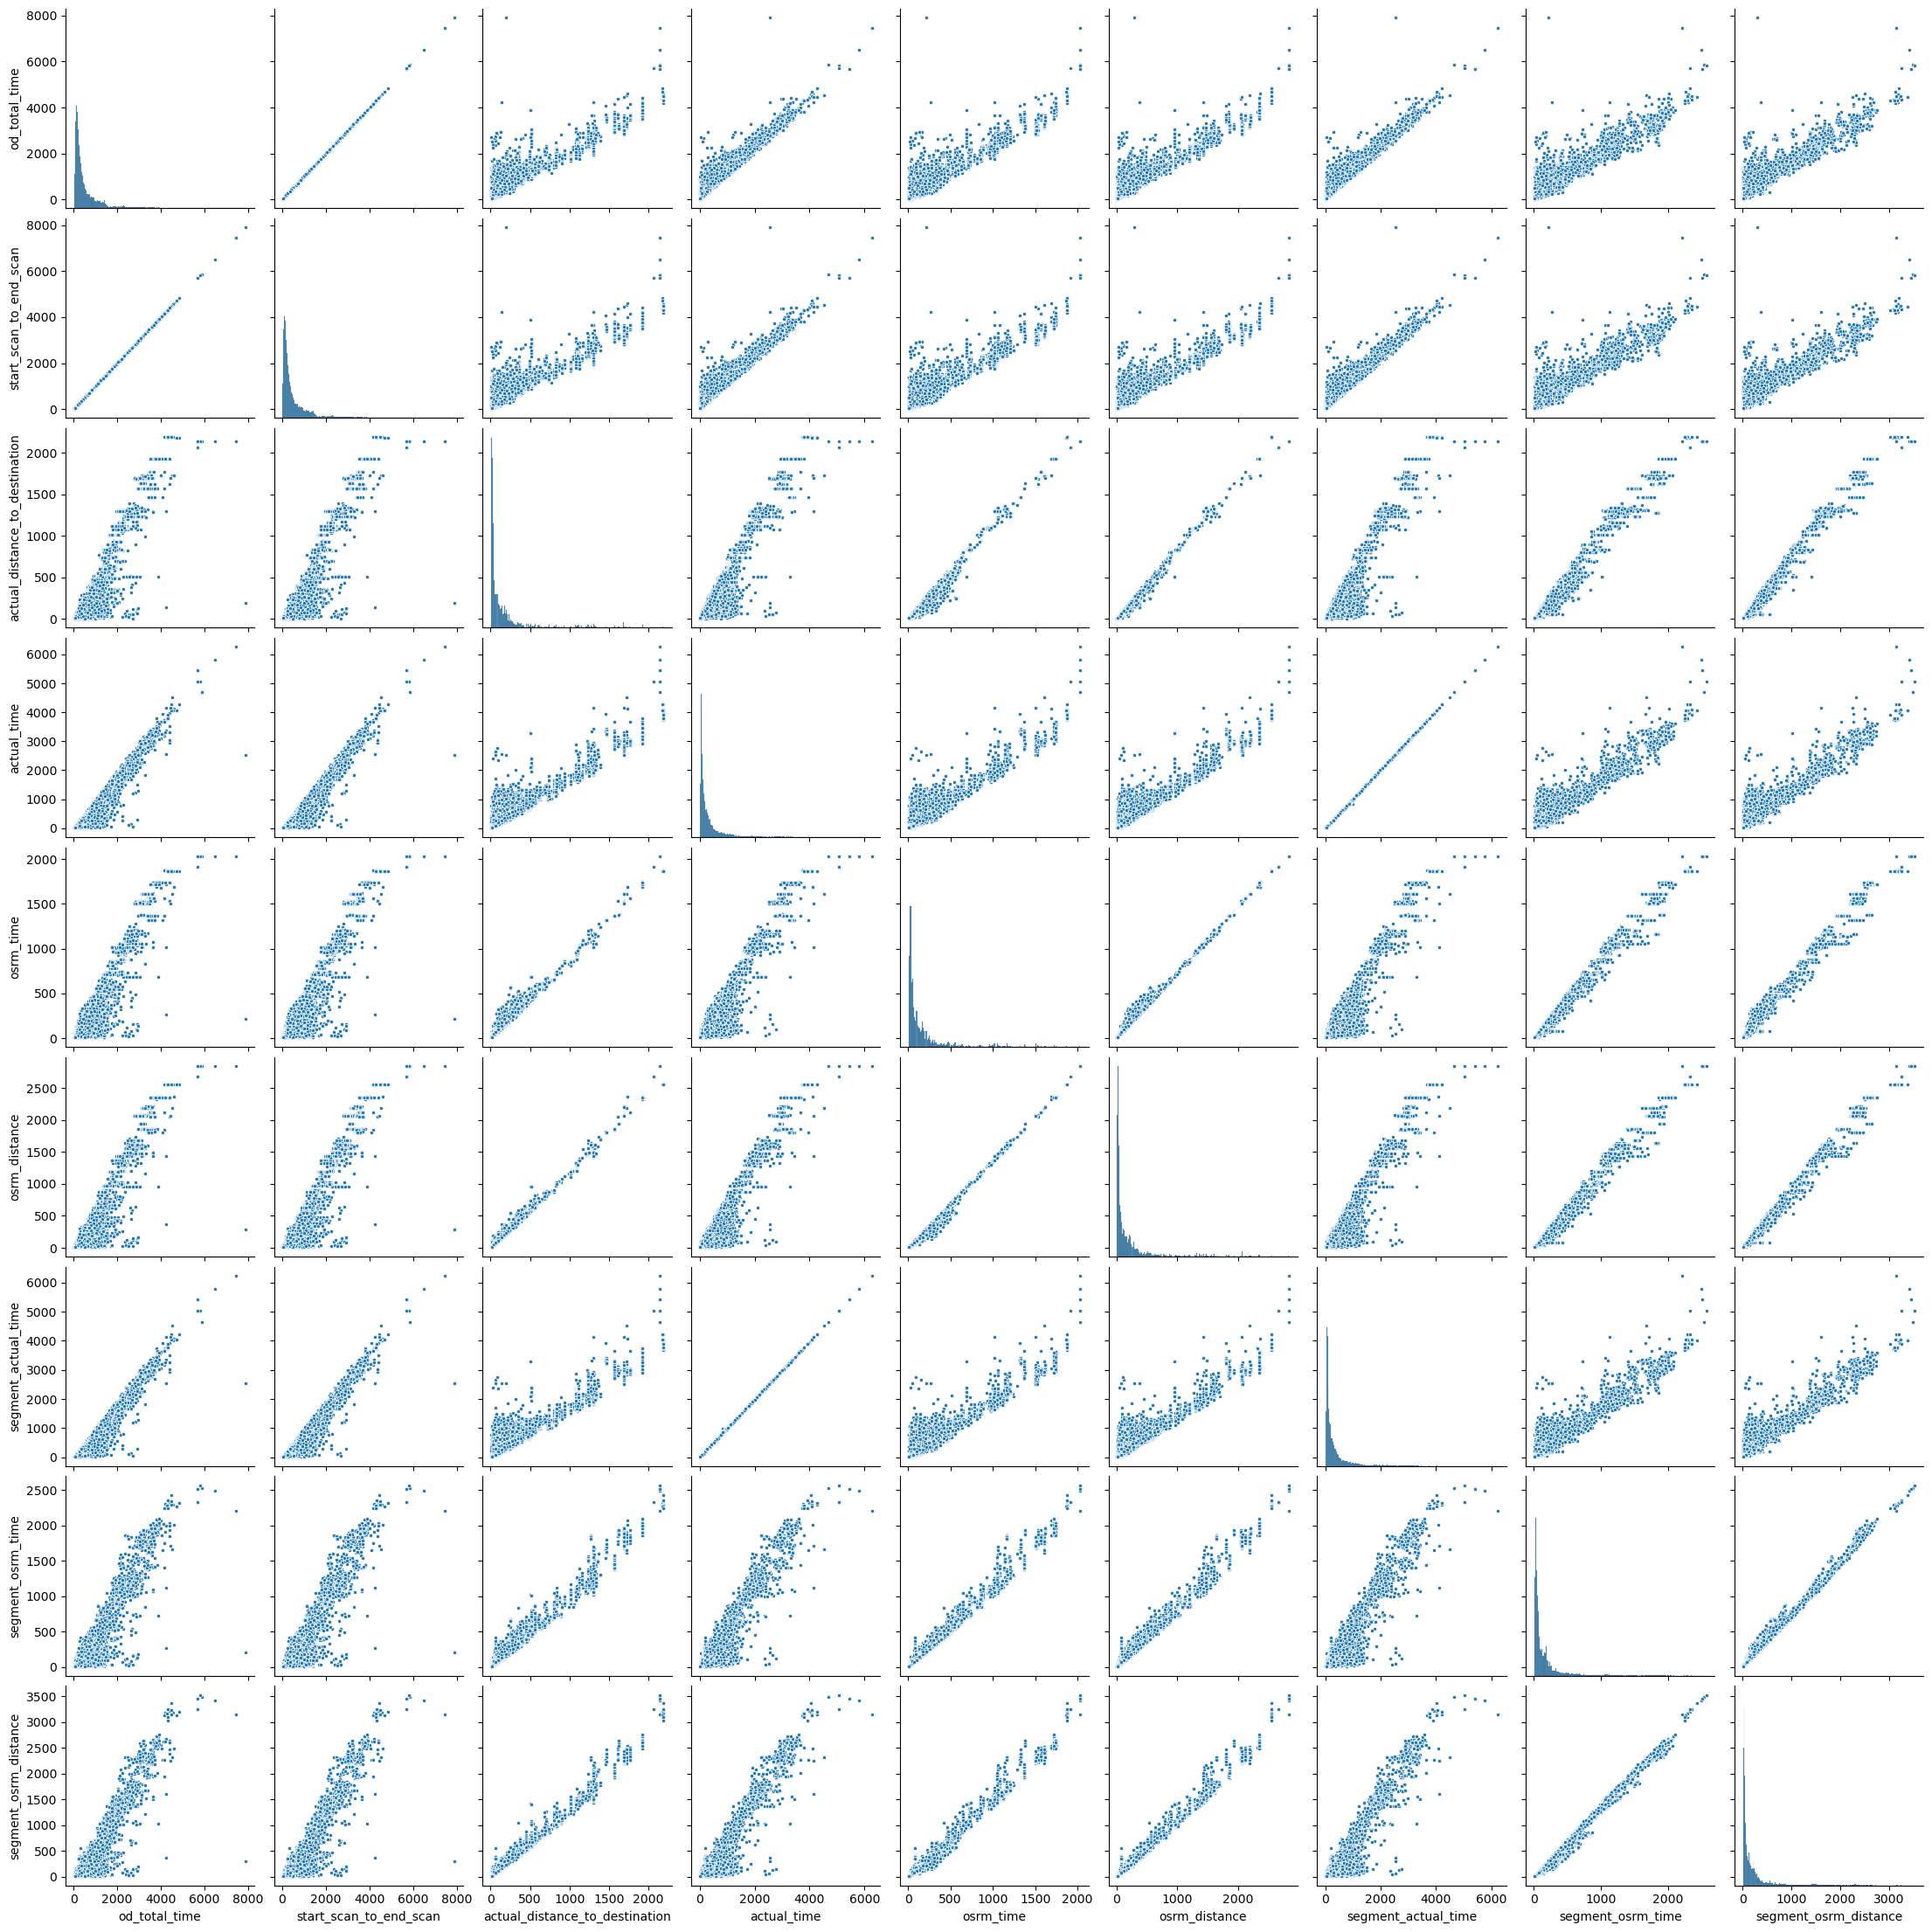

In [127]:
numerical_columns = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']

sns.pairplot(data=df2,vars=numerical_columns,markers='.')
plt.show()

In [73]:
df_corr = df2[numerical_columns].corr()
df_corr.T

,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
od_total_time,1.000000,0.999999,0.918222,0.961094,0.926516,0.924219,0.961119,0.918490,0.919199
start_scan_to_end_scan,0.999999,1.000000,0.918308,0.961147,0.926571,0.924299,0.961171,0.918561,0.919291
actual_distance_to_destination,0.918222,0.918308,1.000000,0.953757,0.993561,0.997264,0.952821,0.987538,0.993061
actual_time,0.961094,0.961147,0.953757,1.000000,0.958593,0.959214,0.999989,0.953872,0.956967
osrm_time,0.926516,0.926571,0.993561,0.958593,1.000000,0.997580,0.957765,0.993259,0.991608
osrm_distance,0.924219,0.924299,0.997264,0.959214,0.997580,1.000000,0.958353,0.991798,0.994710
segment_actual_time,0.961119,0.961171,0.952821,0.999989,0.957765,0.958353,1.000000,0.953039,0.956106
segment_osrm_time,0.918490,0.918561,0.987538,0.953872,0.993259,0.991798,0.953039,1.000000,0.996092
segment_osrm_distance,0.919199,0.919291,0.993061,0.956967,0.991608,0.994710,0.956106,0.996092,1.000000


## Heatmap

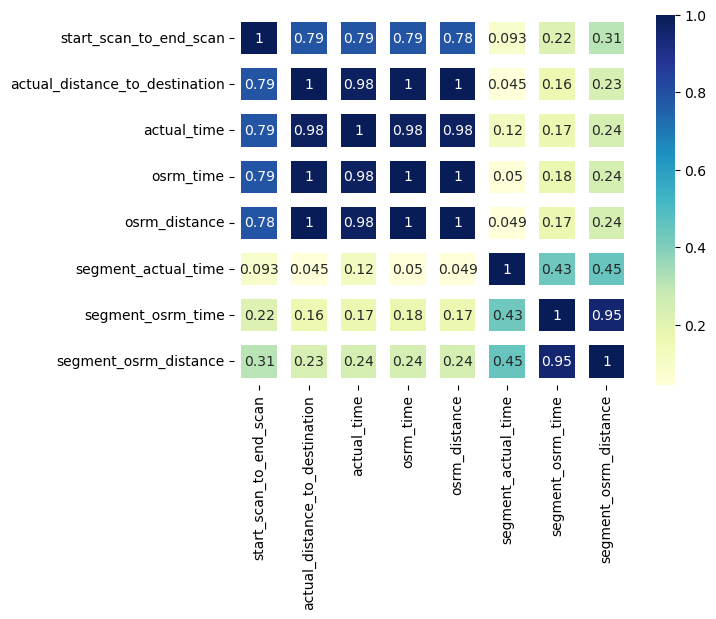

In [74]:
sns.heatmap(df.corr(),annot=True,linewidths=10,linecolor='white',cmap="YlGnBu")
plt.show()

## In-depth Analysis and Feature Engineering

### Compare the difference between od_total_time and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

#### Step 1. Set Null Hypothesis

##### Null Hypothesis(h0) : od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are same.

##### Alternate Hypothesis(ha) : od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are different.

#### Step 2. Check for basic assumptions of hypothesis

##### Check using QQ plot
##### Checking homogenity of variance using Levene's test

#### Step 3. We will use T-test if our assumptions on t-test are met. Otherwise, we will use non-parametric test like Mann Whitney-U test.

#### Step 4. Fix value of alpha = 0.05

##### if alpha < 0.05 (Reject Null Hypothesis)
##### if alpha > 0.05 (Fail to reject null hypothesis)

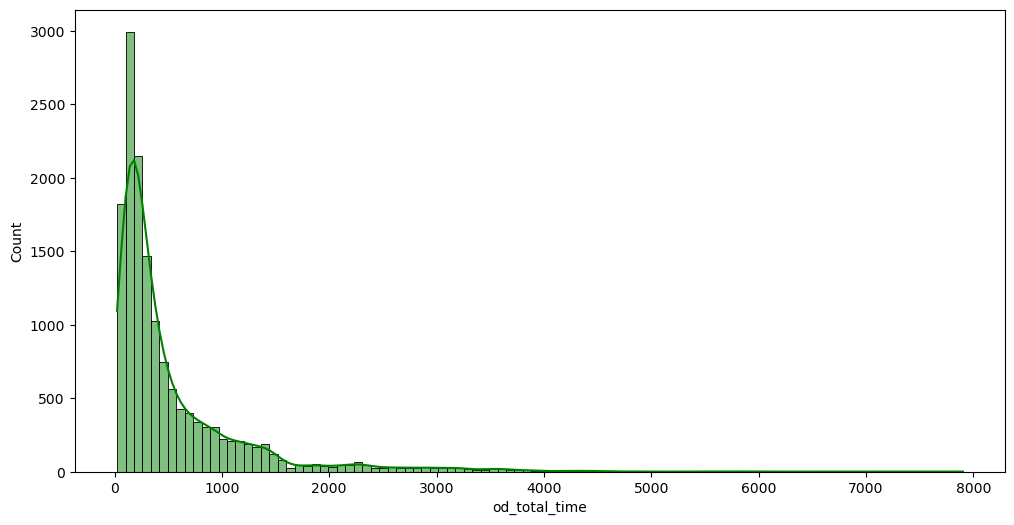

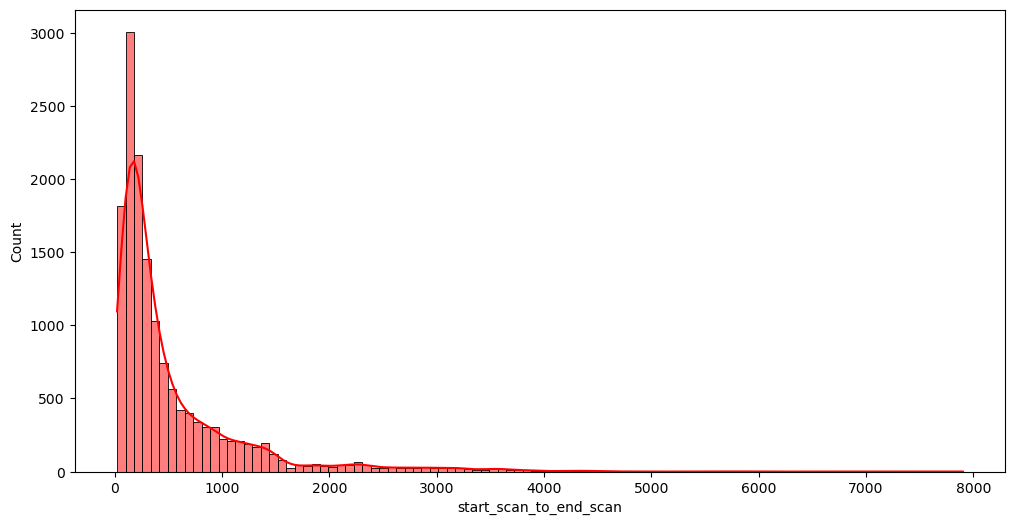

In [75]:
plt.figure(figsize=(12,6))
sns.histplot(df2['od_total_time'],color='green',bins=100,kde=True)
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df2['start_scan_to_end_scan'],color='red',bins=100,kde=True)
plt.show()

##### Both histograms are not normally distributed and are right skewed

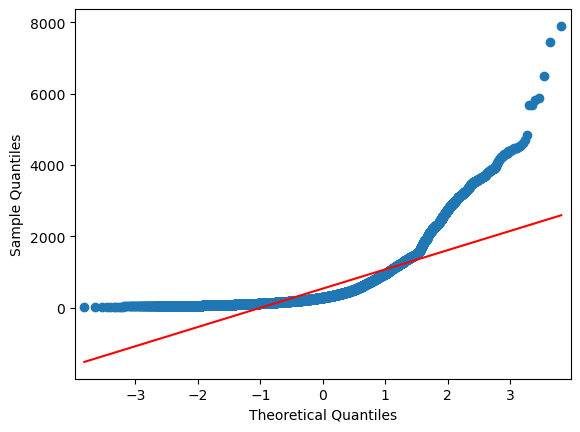

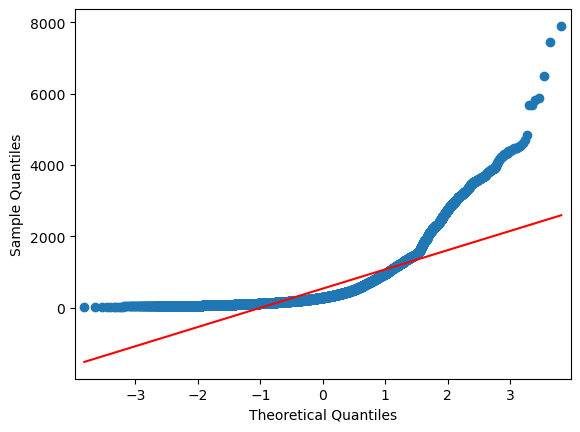

In [76]:
## Checking Normality with QQ Plots

from statsmodels.graphics.gofplots import qqplot

qqplot(df2['od_total_time'],line='r')

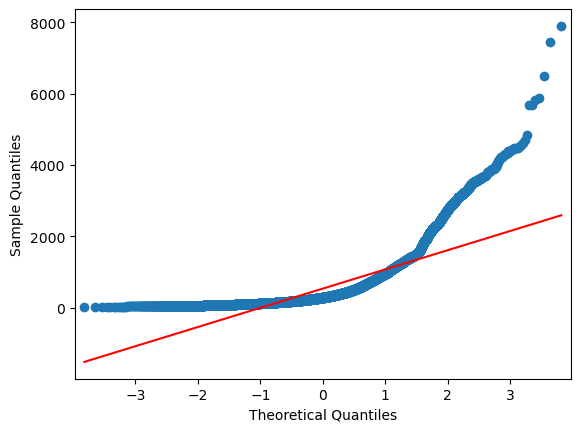

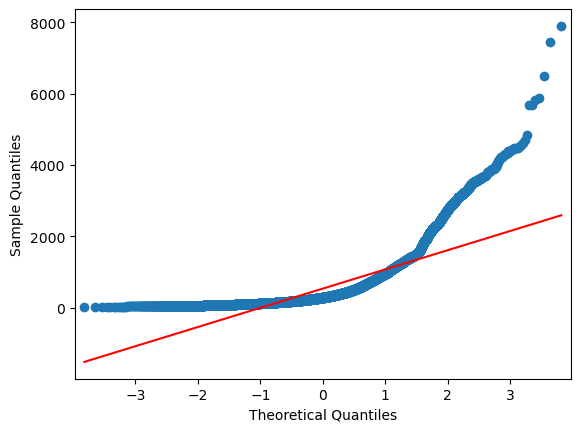

In [77]:
## Checking Normality with QQ Plots

from statsmodels.graphics.gofplots import qqplot

qqplot(df2['start_scan_to_end_scan'],line='r')

#### Applying Shapiro-Wilkins test to check normality

In [78]:
# H0 : Distribution is normal
# Ha : Distribution is not normal

from scipy.stats import shapiro
test_stats1,pval1 = shapiro(df2['od_total_time'])
if pval1<0.05:
    print('od_total_time is not normally distributed because p-value :',pval1)
else:
    print('od_total_time is normally distributed because p-value :',pval1)

od_total_time is not normally distributed because p-value : 0.0


In [79]:
# H0 : Distribution is normal
# Ha : Distribution is not normal

from scipy.stats import shapiro
test_stats2,pval2 = shapiro(df2['start_scan_to_end_scan'])
if pval1<0.05:
    print('start_scan_to_end_scan is not normally distributed because p-value :',pval2)
else:
    print('start_scan_to_end_scan is normally distributed because p-value :',pval2)

start_scan_to_end_scan is not normally distributed because p-value : 0.0


#### Checking Homogenity of variance using Levene's Test

In [80]:
# H0 : Variance is homogenous
# Ha : Variance is non homogenous

from scipy.stats import levene
test_stats,p_lev = levene(df2['od_total_time'],df2['start_scan_to_end_scan'])
if p_lev<0.05:
    print('Variance is non homogenous because p-val is',p_lev)
else:
     print('Variance is homogenous because p-val is',p_lev)

Variance is homogenous because p-val is 0.9668007217581142


#### Samples are not normally distributed , so we will use non-parametric test like Mann Whitney-U test.

In [81]:
# Null Hypothesis(h0) : od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are same.
# Alternate Hypothesis(ha) : od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are different.

from scipy.stats import mannwhitneyu

t_stats,p_val = mannwhitneyu(df2['od_total_time'],df2['start_scan_to_end_scan'])
if p_val<0.05:
    print('p-value :',p_val)
    print('od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are different')
else:
    print('p-value :',p_val)
    print('od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are same')

p-value : 0.7815123224221716
od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are same


### Do hypothesis testing / visual analysis between actual_time aggregated value and OSRM time aggregated value

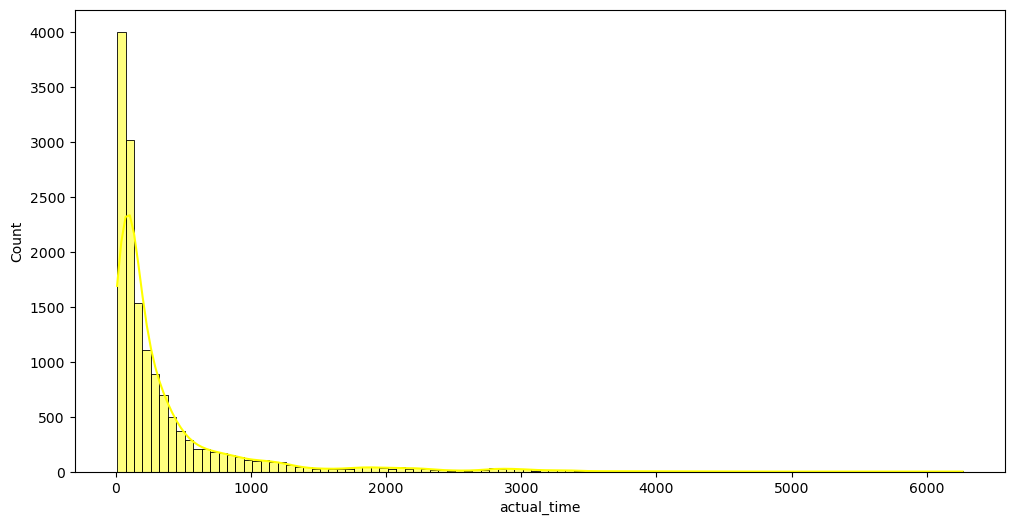

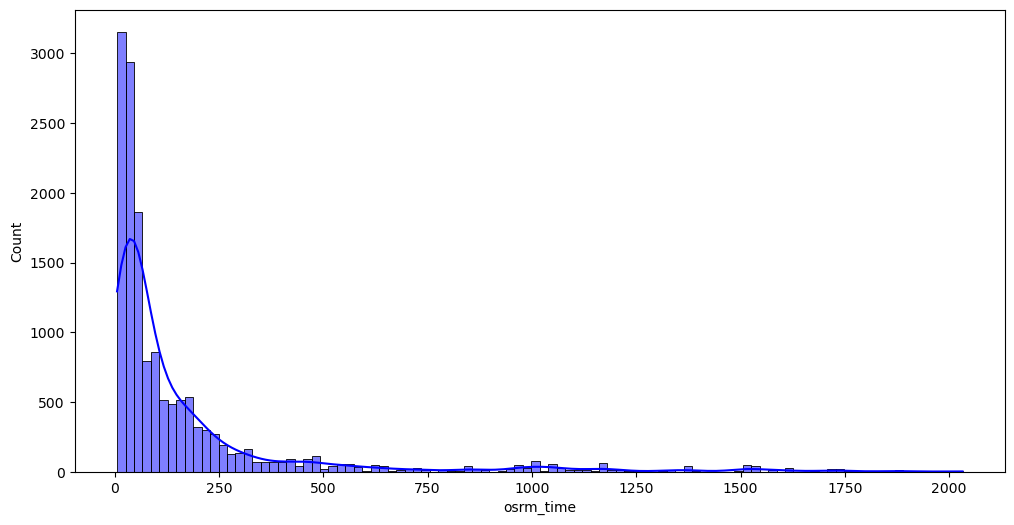

In [82]:
plt.figure(figsize=(12,6))
sns.histplot(df2['actual_time'],color='yellow',bins=100,kde=True)
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df2['osrm_time'],color='blue',bins=100,kde=True)
plt.show()

#### Both histograms are not normally distributed and are right skewed

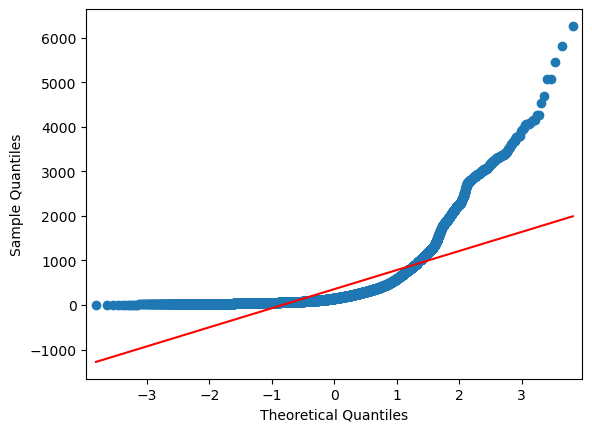

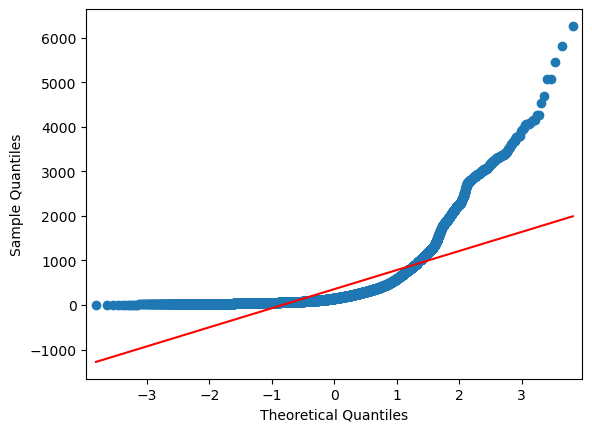

In [83]:
## Checking Normality with QQ Plots

from statsmodels.graphics.gofplots import qqplot

qqplot(df2['actual_time'],line='r')

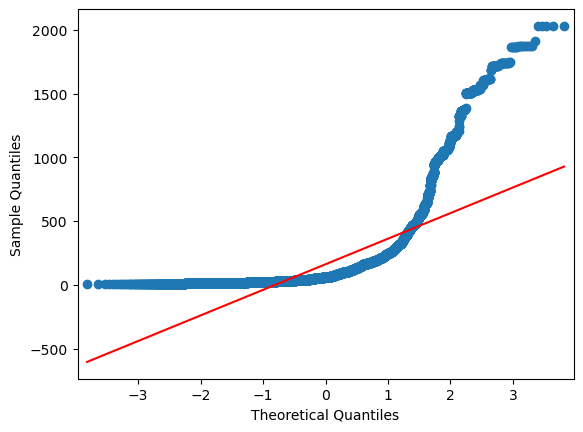

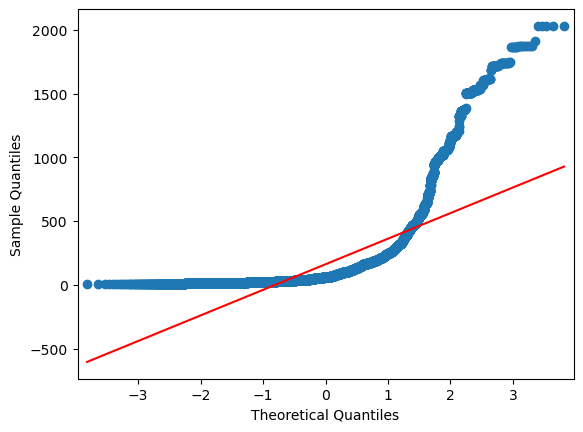

In [84]:
## Checking Normality with QQ Plots

from statsmodels.graphics.gofplots import qqplot

qqplot(df2['osrm_time'],line='r')

#### Applying Shapiro-Wilkins test to check normality

In [85]:
# H0 : Distribution is normal
# Ha : Distribution is not normal

from scipy.stats import shapiro
test_stats1,pval1 = shapiro(df2['actual_time'])
if pval1<0.05:
    print('actual_time is not normally distributed because p-value :',pval1)
else:
    print('actual_time is normally distributed because p-value :',pval1)

actual_time is not normally distributed because p-value : 0.0


In [86]:
# H0 : Distribution is normal
# Ha : Distribution is not normal

from scipy.stats import shapiro
test_stats1,pval1 = shapiro(df2['osrm_time'])
if pval1<0.05:
    print('osrm_time is not normally distributed because p-value :',pval1)
else:
    print('osrm_time is normally distributed because p-value :',pval1)

osrm_time is not normally distributed because p-value : 0.0


#### Checking Homogenity of variance by Levene's Test

In [87]:
# H0 : Variance is homogenous
# Ha : Variance is non homogenous

from scipy.stats import levene
test_stats,p_lev = levene(df2['actual_time'],df2['osrm_time'])
if p_lev<0.05:
    print('Variance is non homogenous because p-val is',p_lev)
else:
     print('Variance is homogenous because p-val is',p_lev)

Variance is non homogenous because p-val is 1.871297993683208e-220


#### Samples are not normally distributed , so we will use non-parametric test Mann Whitney-U test

In [88]:
# Null Hypothesis(h0) : actual_time and osrm_time are same.
# Alternate Hypothesis(ha) : actual_time and osrm_time are different.

from scipy.stats import mannwhitneyu

t_stats,p_val = mannwhitneyu(df2['actual_time'],df2['osrm_time'])
if p_val<0.05:
    print('p-value :',p_val)
    print('actual_time and osrm_time are different(not_similar)')
else:
    print('p-value :',p_val)
    print('actual_time and osrm_time are same')

p-value : 0.0
actual_time and osrm_time are different(not_similar)


## Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value

In [89]:
df2[['actual_time','segment_actual_time']].describe()

,actual_time,segment_actual_time
count,14817.000000,14817.000000
mean,357.143754,353.892286
std,561.396157,556.247965
min,9.000000,9.000000
25%,67.000000,66.000000
50%,149.000000,147.000000
75%,370.000000,367.000000
max,6265.000000,6230.000000


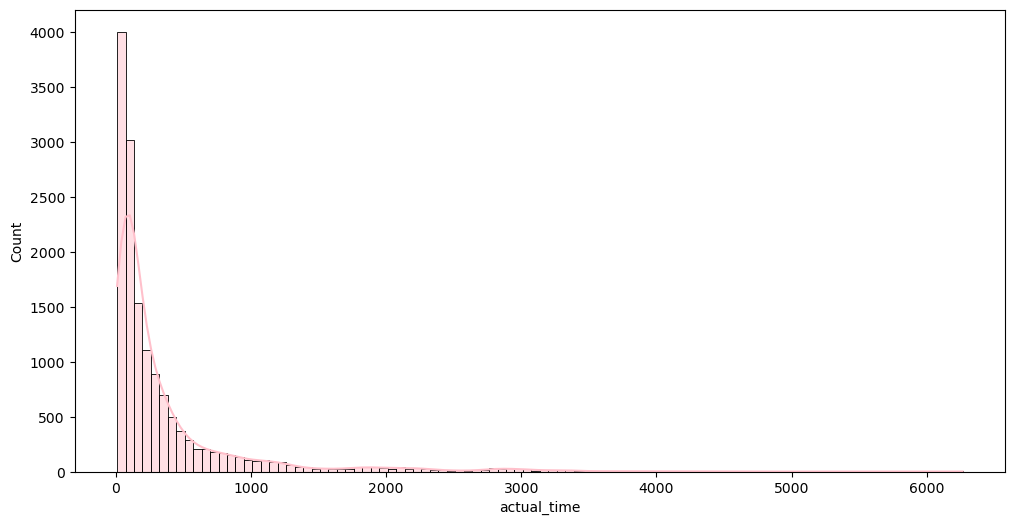

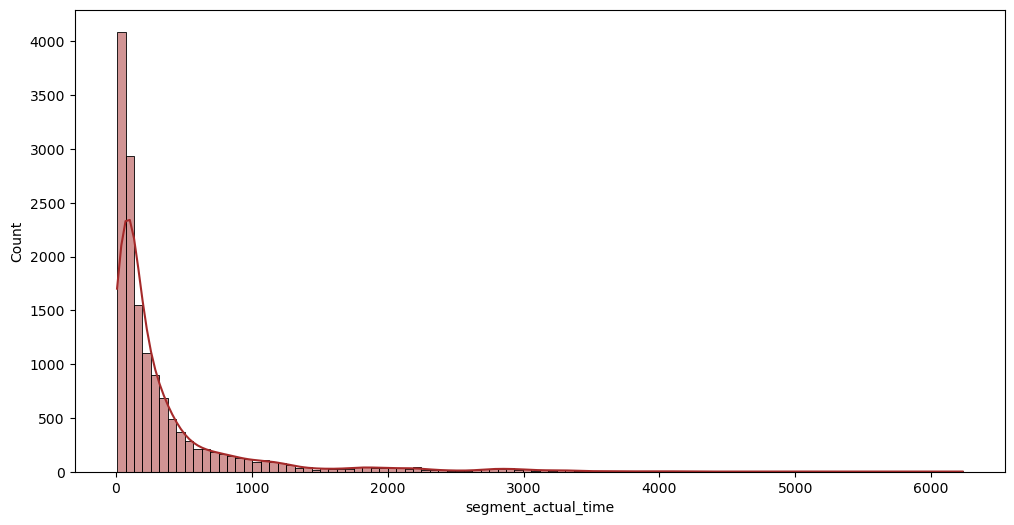

In [90]:
plt.figure(figsize=(12,6))
sns.histplot(df2['actual_time'],color='pink',bins=100,kde=True)
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df2['segment_actual_time'],color='brown',bins=100,kde=True)
plt.show()

#### Both are right skewed distribution and are not normally distributed

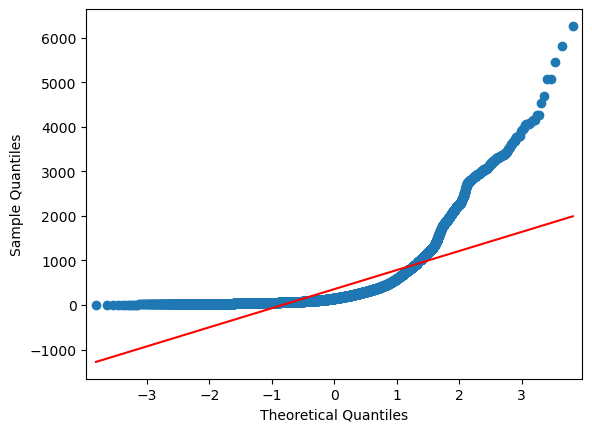

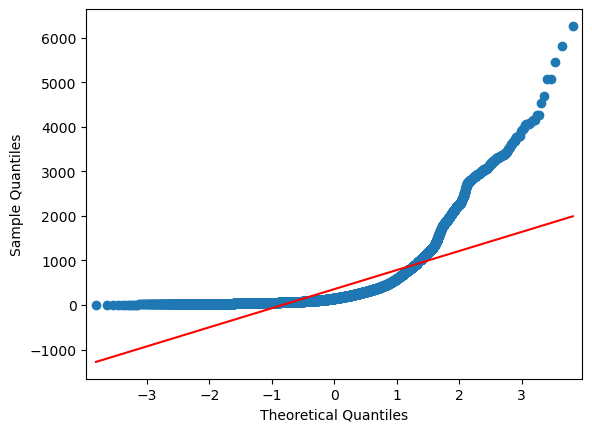

In [91]:
## Checking Normality with QQ Plots

from statsmodels.graphics.gofplots import qqplot

qqplot(df2['actual_time'],line='r')

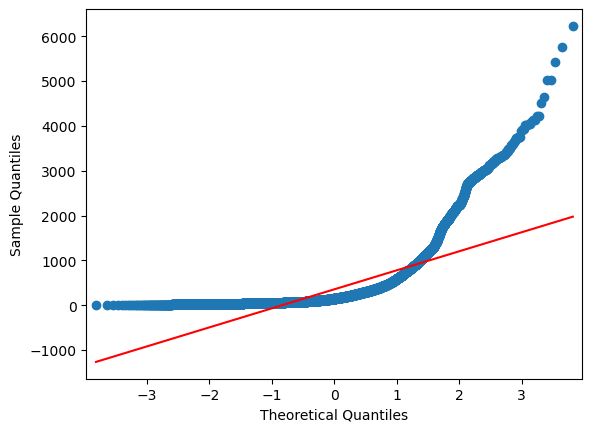

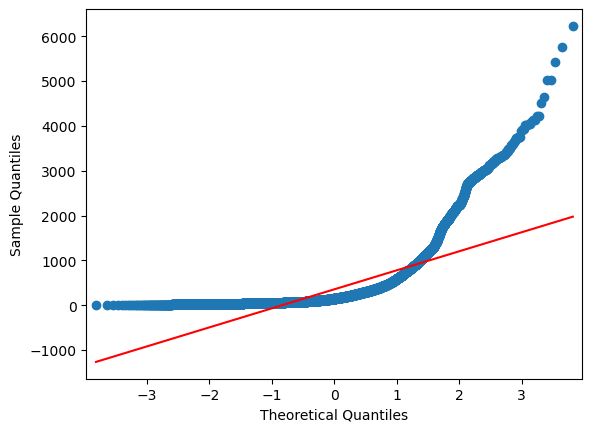

In [92]:
## Checking Normality with QQ Plots

from statsmodels.graphics.gofplots import qqplot

qqplot(df2['segment_actual_time'],line='r')

#### Applying Shapiro-Wilkins test to check normality

In [93]:
# H0 : Distribution is normal
# Ha : Distribution is not normal

from scipy.stats import shapiro
test_stats1,pval1 = shapiro(df2['actual_time'])
if pval1<0.05:
    print('actual_time is not normally distributed because p-value :',pval1)
else:
    print('actual_time is normally distributed because p-value :',pval1)

actual_time is not normally distributed because p-value : 0.0


In [94]:
# H0 : Distribution is normal
# Ha : Distribution is not normal

from scipy.stats import shapiro
test_stats1,pval1 = shapiro(df2['segment_actual_time'])
if pval1<0.05:
    print('segment_actual_time is not normally distributed because p-value :',pval1)
else:
    print('segment_actual_time is normally distributed because p-value :',pval1)

segment_actual_time is not normally distributed because p-value : 0.0


#### Checking Homogenity of variance by Levene's Test

In [95]:
# H0 : Variance is homogenous
# Ha : Variance is non homogenous

from scipy.stats import levene
test_stats,p_lev = levene(df2['actual_time'],df2['segment_actual_time'])
if p_lev<0.05:
    print('Variance is non homogenous because p-val is',p_lev)
else:
     print('Variance is homogenous because p-val is',p_lev)

Variance is homogenous because p-val is 0.6955022668700895


In [96]:
# Null Hypothesis(h0) : actual_time and segment_actual_time are same.
# Alternate Hypothesis(ha) : actual_time and segment_actual_time are different.

from scipy.stats import mannwhitneyu

t_stats,p_val = mannwhitneyu(df2['actual_time'],df2['segment_actual_time'])
if p_val<0.05:
    print('p-value :',p_val)
    print('actual_time and segment_actual_time are different(not_similar)')
else:
    print('p-value :',p_val)
    print('actual_time and segment_actual_time are same')

p-value : 0.4164235159622476
actual_time and segment_actual_time are same


### Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value

In [97]:
df2[['osrm_distance','segment_osrm_distance']].describe()

,osrm_distance,segment_osrm_distance
count,14817.000000,14817.000000
mean,204.344689,223.201161
std,370.395573,416.628374
min,9.072900,9.072900
25%,30.819200,32.654500
50%,65.618800,70.154400
75%,208.475000,218.802400
max,2840.081000,3523.632400


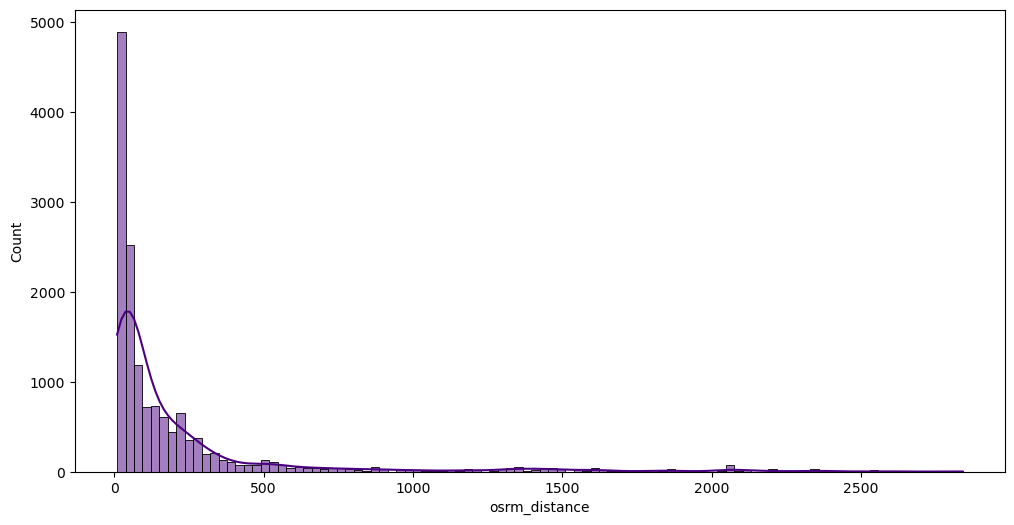

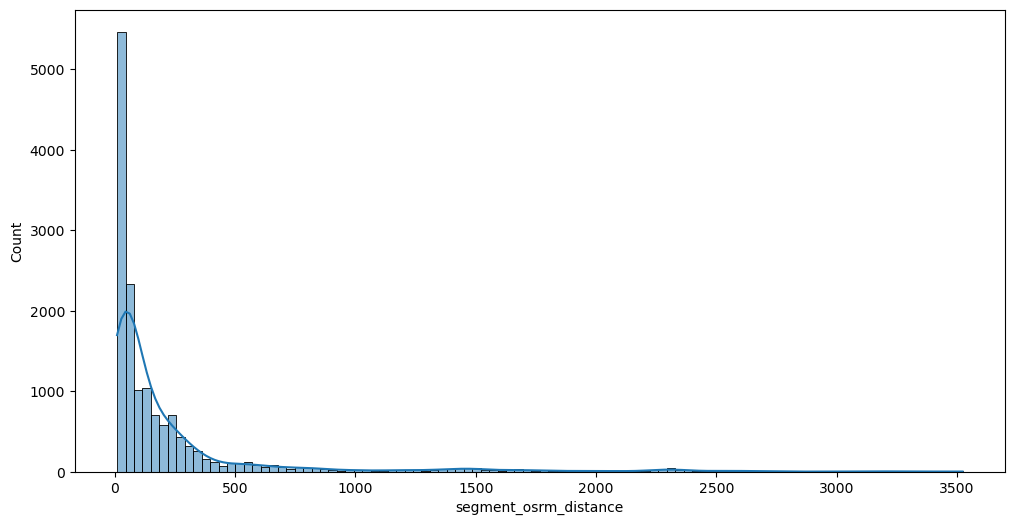

In [98]:
plt.figure(figsize=(12,6))
sns.histplot(df2['osrm_distance'],color='indigo',bins=100,kde=True)
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df2['segment_osrm_distance'],bins=100,kde=True)
plt.show()

#### Both are right skewed and not normally distributed

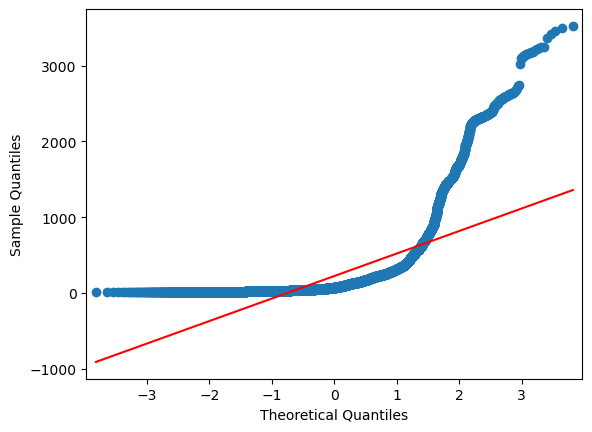

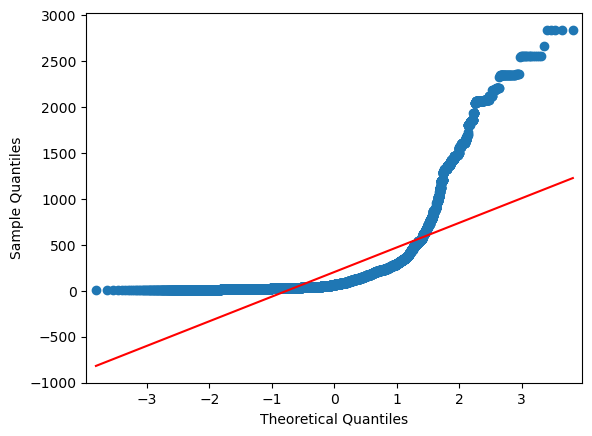

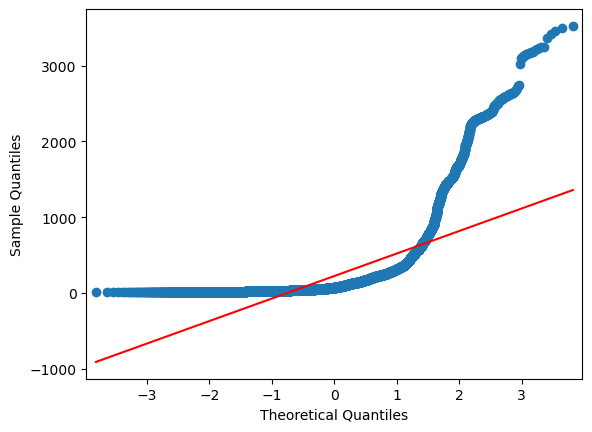

In [99]:
# Checking normality with QQ plot
qqplot(df2['osrm_distance'],line='r')
qqplot(df2['segment_osrm_distance'],line='r')

#### Checking normality with Shapiro wilkins test

In [100]:
# H0 : Distribution is normal
# Ha : Distribution is not normal

from scipy.stats import shapiro
test_stats1,pval1 = shapiro(df2['osrm_distance'])
if pval1<0.05:
    print('osrm_distance is not normally distributed because p-value :',pval1)
else:
    print('osrm_distance is normally distributed because p-value :',pval1)

osrm_distance is not normally distributed because p-value : 0.0


In [101]:
# H0 : Distribution is normal
# Ha : Distribution is not normal

from scipy.stats import shapiro
test_stats1,pval1 = shapiro(df2['segment_osrm_distance'])
if pval1<0.05:
    print('segment_osrm_distance is not normally distributed because p-value :',pval1)
else:
    print('segment_osrm_distance is normally distributed because p-value :',pval1)

segment_osrm_distance is not normally distributed because p-value : 0.0


#### Checking homogenity of variance using Levene's test

In [102]:
# H0 : Variance is homogenous
# Ha : Variance is non homogenous

from scipy.stats import levene
test_stats,p_lev = levene(df2['osrm_distance'],df2['segment_osrm_distance'])
if p_lev<0.05:
    print('Variance is non homogenous because p-val is',p_lev)
else:
     print('Variance is homogenous because p-val is',p_lev)

Variance is non homogenous because p-val is 0.00020976354422600578


In [103]:
# Null Hypothesis(h0) : osrm_distance and segment_osrm_distance are same.
# Alternate Hypothesis(ha) : osrm_distance and segment_osrm_distance are different.

from scipy.stats import mannwhitneyu

t_stats,p_val = mannwhitneyu(df2['osrm_distance'],df2['segment_osrm_distance'])
if p_val<0.05:
    print('p-value :',p_val)
    print('osrm_distance and segment_osrm_distance are different(not_similar)')
else:
    print('p-value :',p_val)
    print('osrm_distance and segment_osrm_distance are same')

p-value : 9.511383588276373e-07
osrm_distance and segment_osrm_distance are different(not_similar)


## Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value 

In [104]:
df2[['osrm_time','segment_osrm_time']].describe()

,osrm_time,segment_osrm_time
count,14817.000000,14817.000000
mean,161.384018,180.949787
std,271.360995,314.542047
min,6.000000,6.000000
25%,29.000000,31.000000
50%,60.000000,65.000000
75%,168.000000,185.000000
max,2032.000000,2564.000000


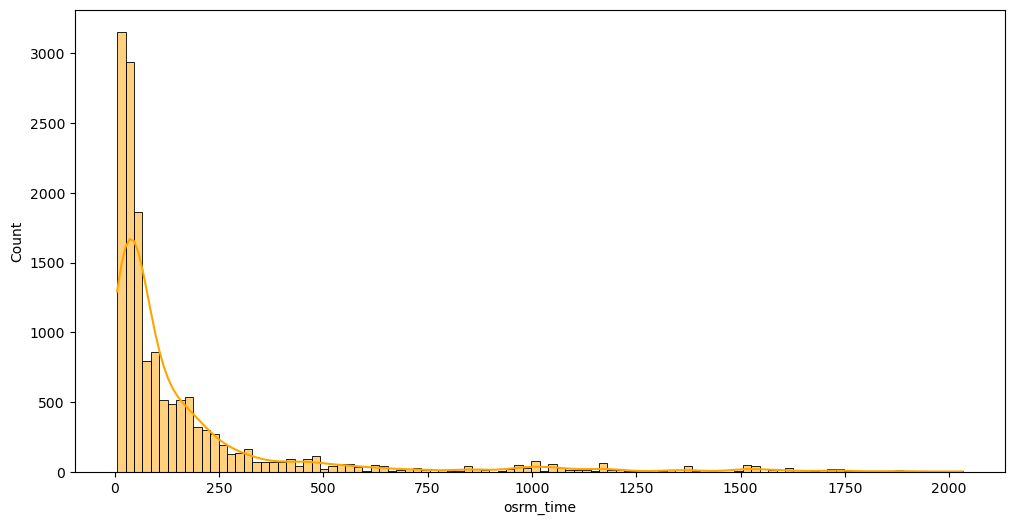

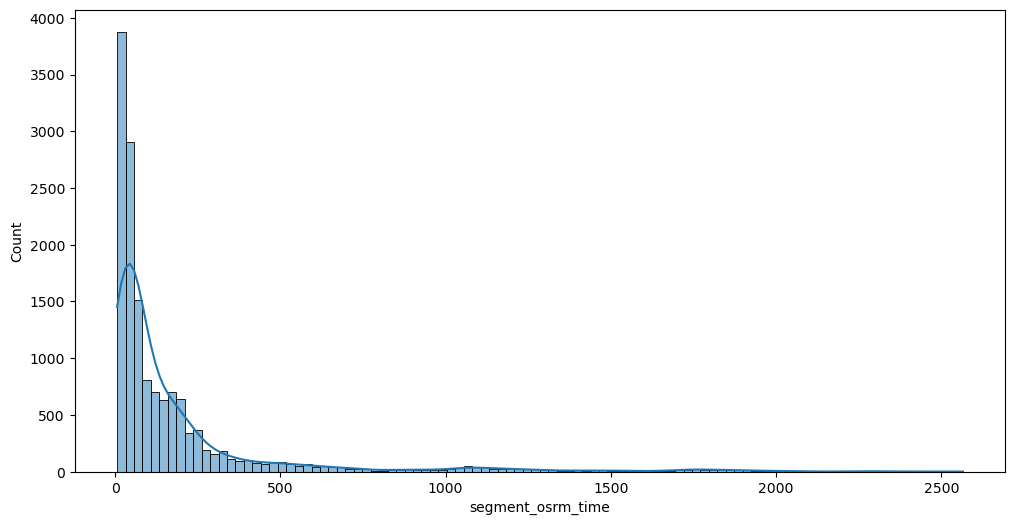

In [105]:
plt.figure(figsize=(12,6))
sns.histplot(df2['osrm_time'],color='orange',bins=100,kde=True)
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df2['segment_osrm_time'],bins=100,kde=True)
plt.show()

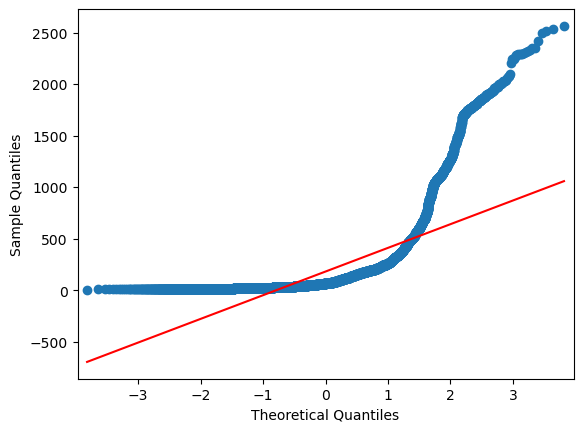

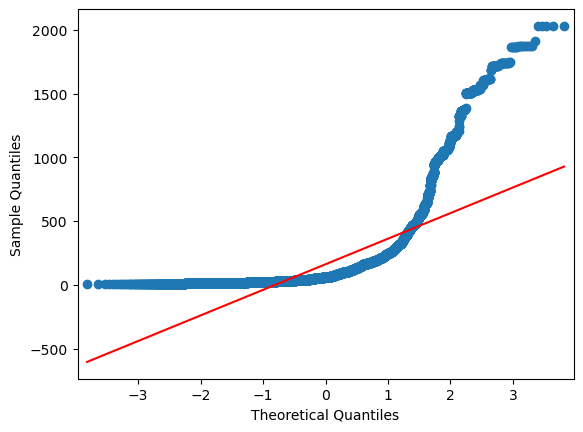

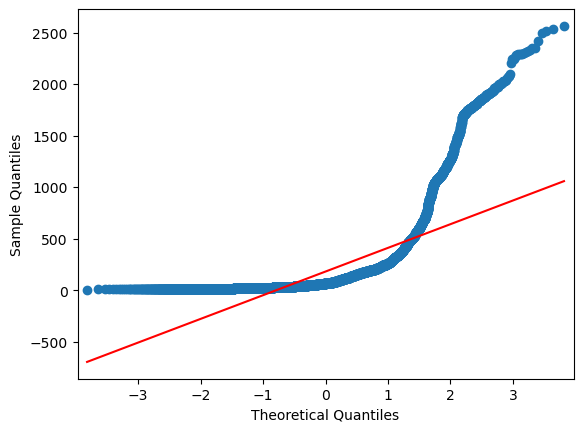

In [106]:
# Checking normality with QQ plot
qqplot(df2['osrm_time'],line='r')
qqplot(df2['segment_osrm_time'],line='r')

#### Checking normality with Shapiro wilkins test

In [107]:
# H0 : Distribution is normal
# Ha : Distribution is not normal

from scipy.stats import shapiro
test_stats1,pval1 = shapiro(df2['osrm_time'])
if pval1<0.05:
    print('osrm_time is not normally distributed because p-value :',pval1)
else:
    print('osrm_time is normally distributed because p-value :',pval1)

osrm_time is not normally distributed because p-value : 0.0


In [108]:
# H0 : Distribution is normal
# Ha : Distribution is not normal

from scipy.stats import shapiro
test_stats1,pval1 = shapiro(df2['segment_osrm_time'])
if pval1<0.05:
    print('segment_osrm_time is not normally distributed because p-value :',pval1)
else:
    print('segment_osrm_time is normally distributed because p-value :',pval1)

segment_osrm_time is not normally distributed because p-value : 0.0


#### Checking homogenity of variance using Levene's test

In [109]:
# H0 : Variance is homogenous
# Ha : Variance is non homogenous

from scipy.stats import levene
test_stats,p_lev = levene(df2['osrm_time'],df2['segment_osrm_time'])
if p_lev<0.05:
    print('Variance is non homogenous because p-val is',p_lev)
else:
     print('Variance is homogenous because p-val is',p_lev)

Variance is non homogenous because p-val is 8.349482669010088e-08


In [110]:
# Null Hypothesis(h0) : osrm_time and segment_osrm_time are same.
# Alternate Hypothesis(ha) : osrm_time and segment_osrm_time are different.

from scipy.stats import mannwhitneyu

t_stats,p_val = mannwhitneyu(df2['osrm_time'],df2['segment_osrm_time'])
if p_val<0.05:
    print('p-value :',p_val)
    print('osrm_time and segment_osrm_time are different(not_similar)')
else:
    print('p-value :',p_val)
    print('osrm_time and segment_osrm_time are same')

p-value : 2.2995370859748865e-08
osrm_time and segment_osrm_time are different(not_similar)


## Find outliers in the numerical variables, and checking it using visual analysis

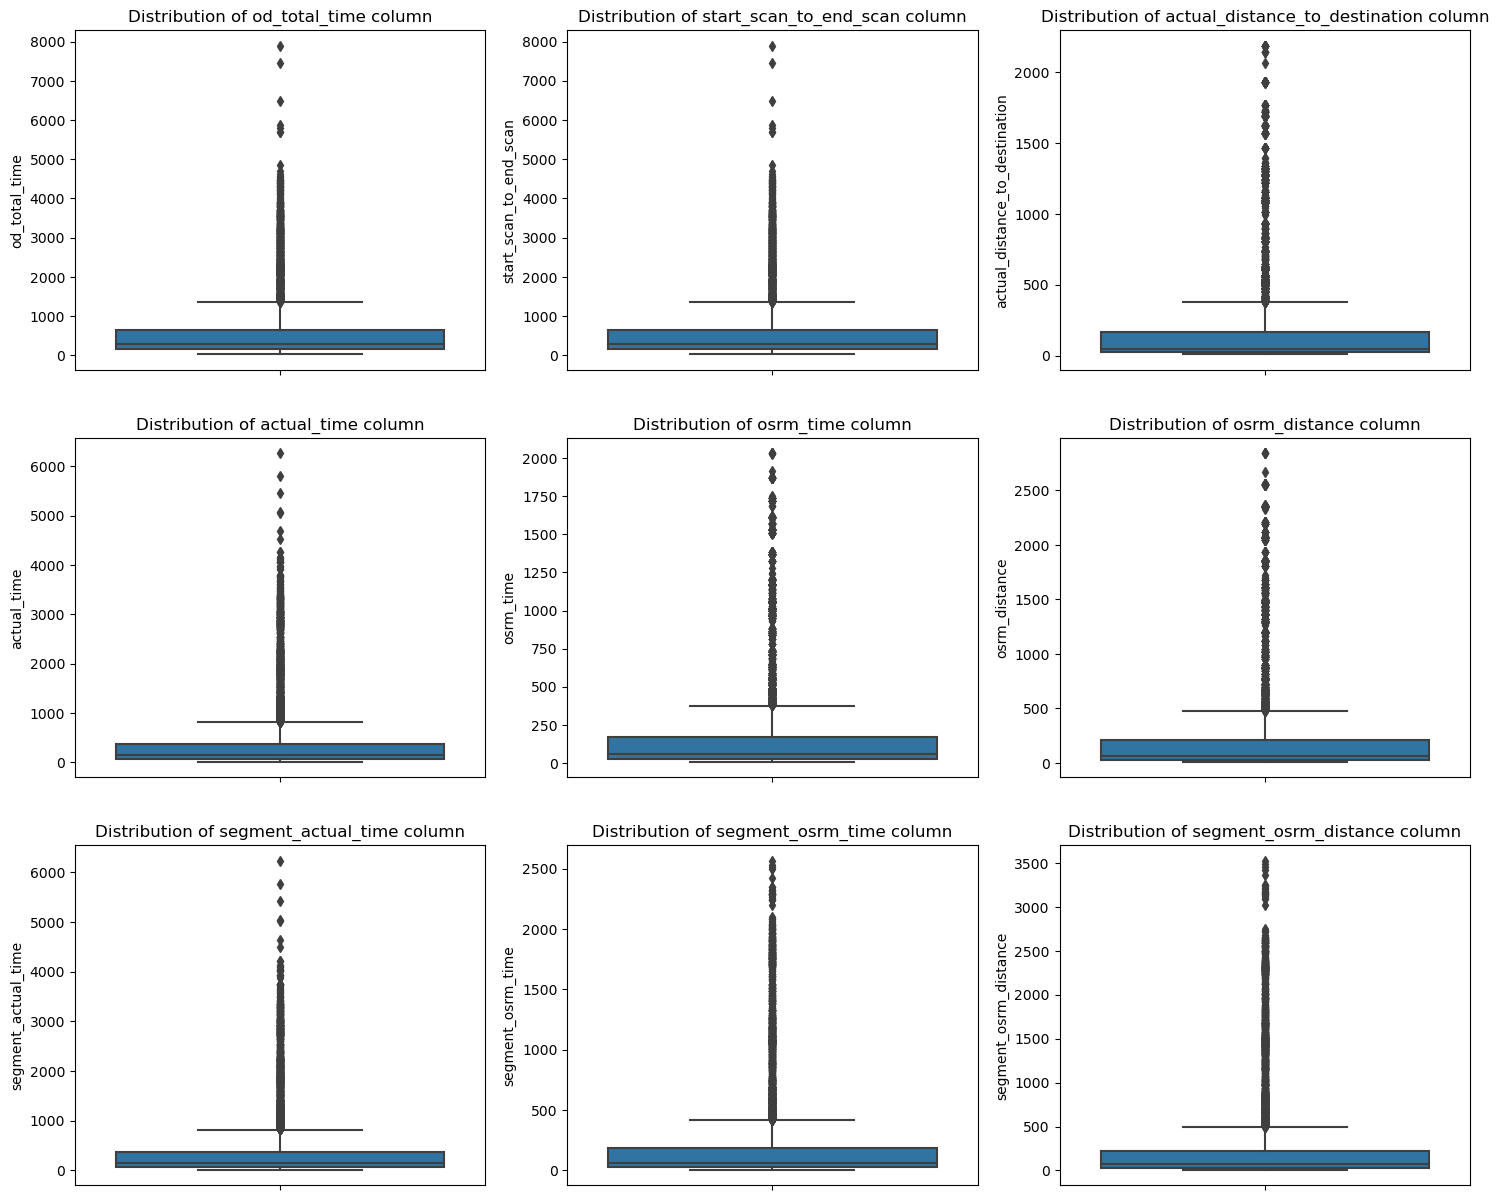

In [111]:
plt.figure(figsize = (18, 15))
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df2,y=numerical_columns[i])
    plt.title(f"Distribution of {numerical_columns[i]} column")
    plt.plot()

#### It can be clearly seen all boxplots have large no. of outliers

### Detecting the no. of outliers in each column

In [112]:
for i in numerical_columns:
    q1 = np.percentile(df2[i],25)
    q3 = np.percentile(df2[i],75)
    iqr = q3 - q1
    upper_whisker = q3 + 1.5*iqr
    lower_whisker = q1 - 1.5*iqr
    
    outliers = df2.loc[(df2[i]>upper_whisker) | (df2[i]<lower_whisker) ]
    
    print(f"column : {i}")
    print(f'q1 : {round(q1,2)}')
    print(f'q3 : {round(q3,2)}')
    print(f'iqr : {round(iqr,2)}')
    print(f'upper_whisker : {round(upper_whisker,2)}')
    print(f'lower_whisker : {round(lower_whisker,2)}')
    print(f'No. of outliers : {outliers.shape[0]}')
    print('-'*45)

column : od_total_time
q1 : 149.93
q3 : 638.2
iqr : 488.27
upper_whisker : 1370.6
lower_whisker : -582.48
No. of outliers : 1266
---------------------------------------------
column : start_scan_to_end_scan
q1 : 149.0
q3 : 637.0
iqr : 488.0
upper_whisker : 1369.0
lower_whisker : -583.0
No. of outliers : 1267
---------------------------------------------
column : actual_distance_to_destination
q1 : 22.84
q3 : 164.58
iqr : 141.75
upper_whisker : 377.2
lower_whisker : -189.78
No. of outliers : 1449
---------------------------------------------
column : actual_time
q1 : 67.0
q3 : 370.0
iqr : 303.0
upper_whisker : 824.5
lower_whisker : -387.5
No. of outliers : 1643
---------------------------------------------
column : osrm_time
q1 : 29.0
q3 : 168.0
iqr : 139.0
upper_whisker : 376.5
lower_whisker : -179.5
No. of outliers : 1517
---------------------------------------------
column : osrm_distance
q1 : 30.82
q3 : 208.48
iqr : 177.66
upper_whisker : 474.96
lower_whisker : -235.66
No. of outlie

## Doing one-hot encoding for categorical variables

In [113]:
df2['route_type'].value_counts()

Carting    8908
FTL        5909
Name: route_type, dtype: int64

In [114]:
# Performing one-hot encoding on column 'route_type'

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df2['route_type'] = label_encoder.fit_transform(df2['route_type'])

In [115]:
df2['route_type'].value_counts()

0    8908
1    5909
Name: route_type, dtype: int64

In [116]:
df2['data'].value_counts()

training    10654
test         4163
Name: data, dtype: int64

In [117]:
# Doing one-hot encoding on column 'data'
df2['data'] = label_encoder.fit_transform(df2['data'])

In [118]:
df2['data'].value_counts()

1    10654
0     4163
Name: data, dtype: int64

## Normalize/standardize the numerical features using MinMaxScaler

In [119]:
from sklearn.preprocessing import MinMaxScaler

[]

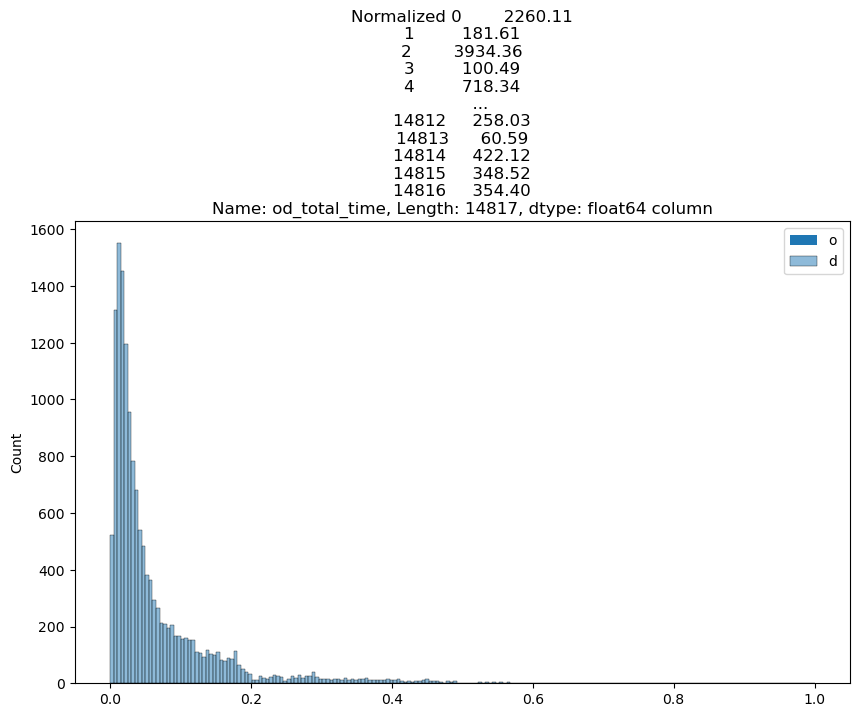

In [120]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['od_total_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['od_total_time']} column")
plt.legend('od_total_time')
plt.plot()

In [121]:
df2.columns

Index(['trip_uuid', 'source_center', 'destination_center', 'data',
       'route_type', 'trip_creation_time', 'source_name', 'destination_name',
       'od_total_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'source_state', 'source_city', 'source_place',
       'destination_state', 'destination_city', 'destination_place',
       'trip_creation_date', 'trip_creation_day', 'trip_creation_month',
       'trip_creation_year', 'trip_creation_week', 'trip_creation_hour'],
      dtype='object')

In [122]:
scaling_columns = ['start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance']

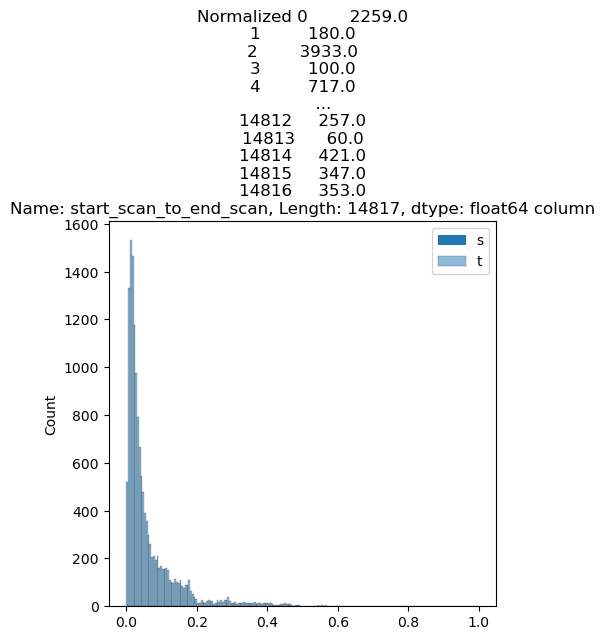

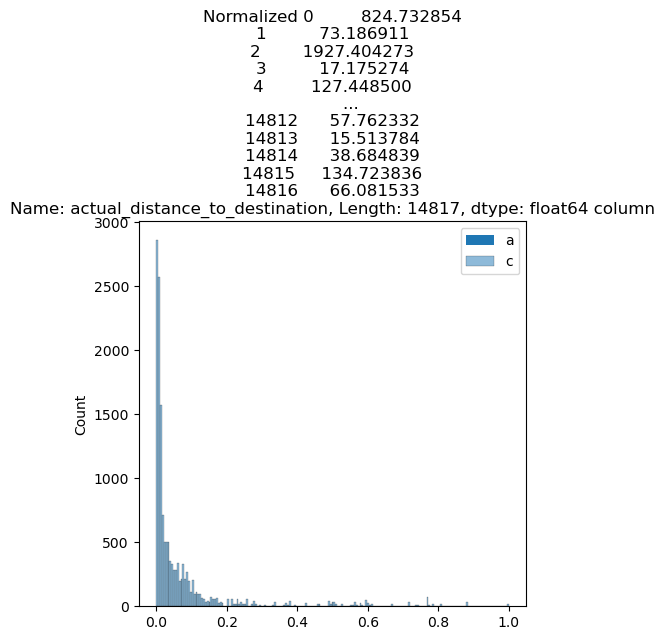

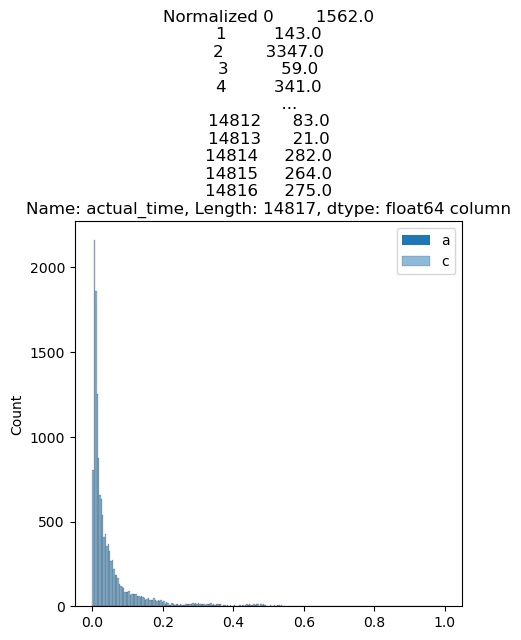

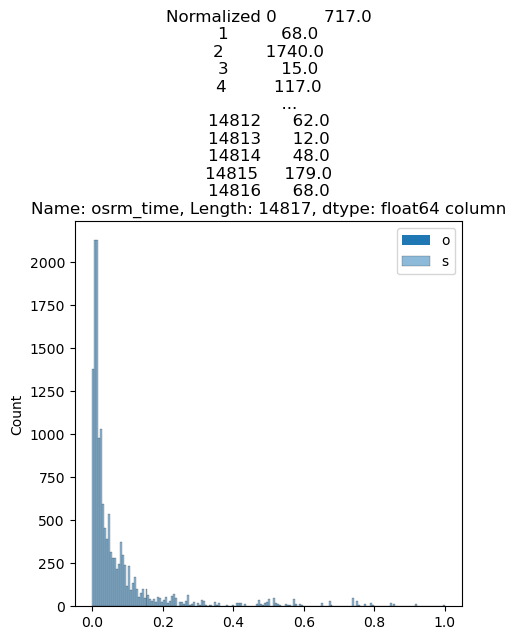

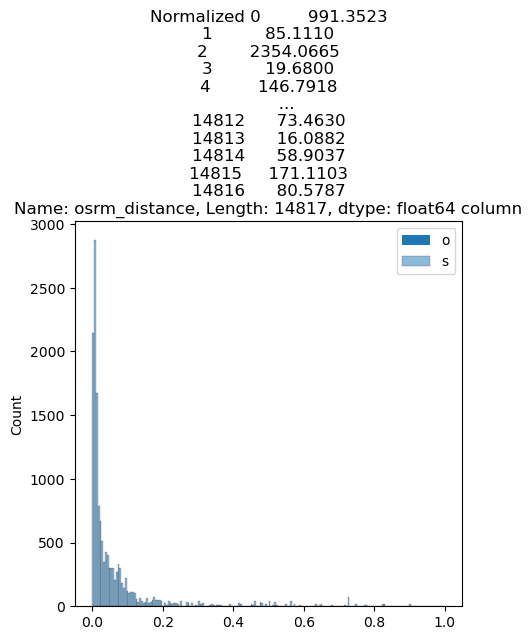

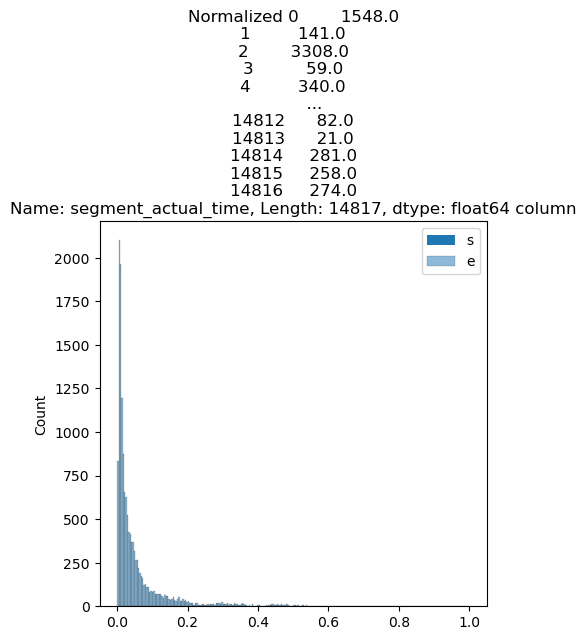

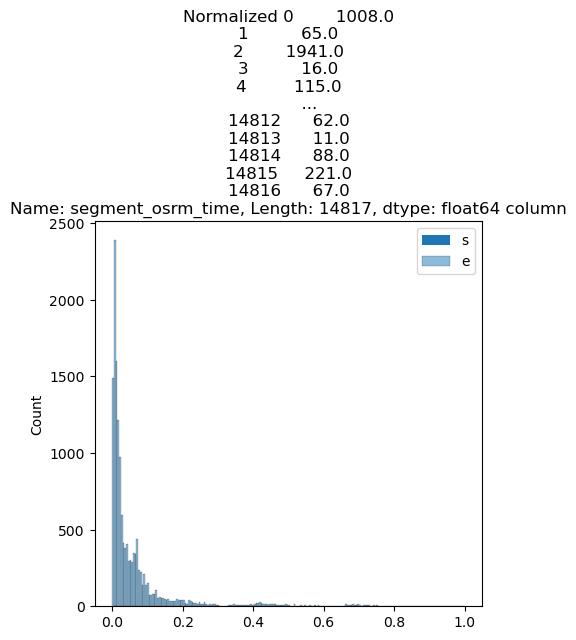

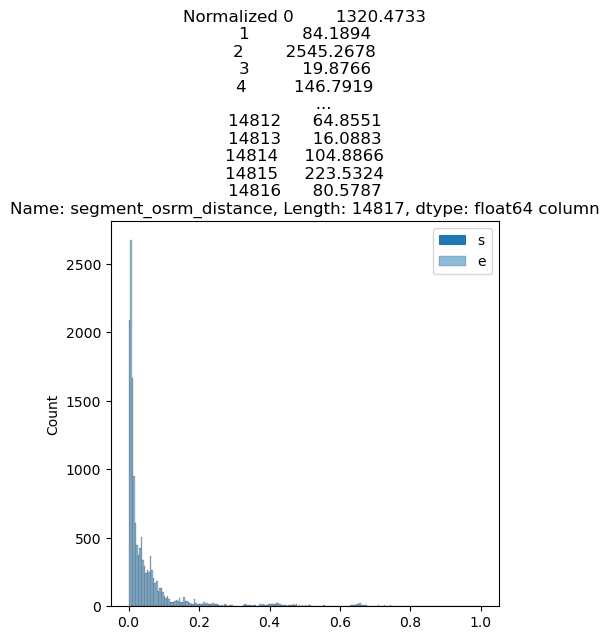

In [123]:
# Scaling all neccessary columns using loop

for i in scaling_columns:
    plt.figure(figsize = (5,5))
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df2[i].to_numpy().reshape(-1, 1))
    sns.histplot(scaled)
    plt.title(f"Normalized {df2[i]} column")
    plt.legend(i)
    plt.plot()

## Column Standardization

In [124]:
from sklearn.preprocessing import StandardScaler

[]

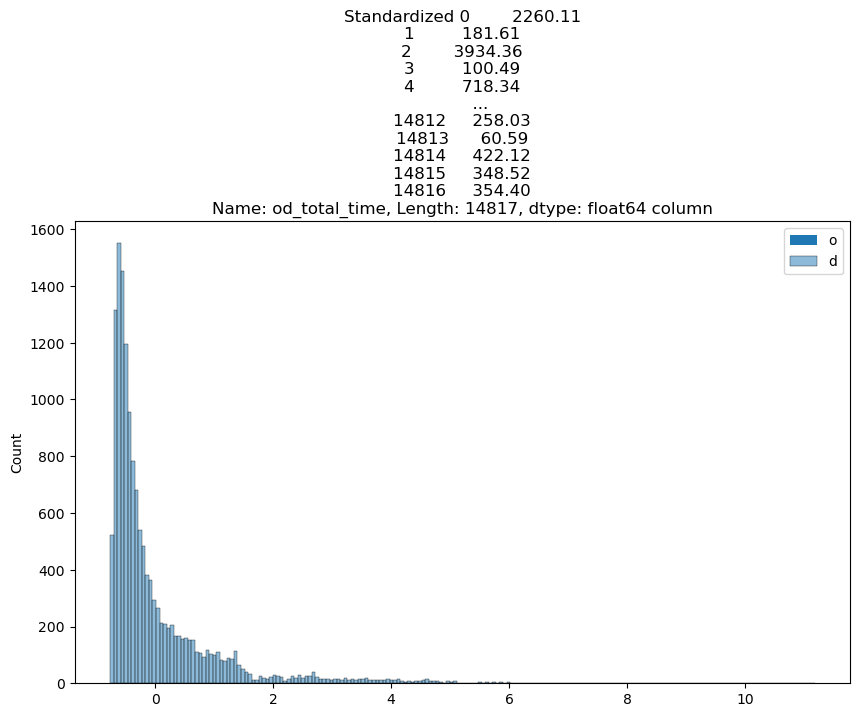

In [125]:
plt.figure(figsize = (10, 6))
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df2['od_total_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['od_total_time']} column")
plt.legend('od_total_time')
plt.plot()

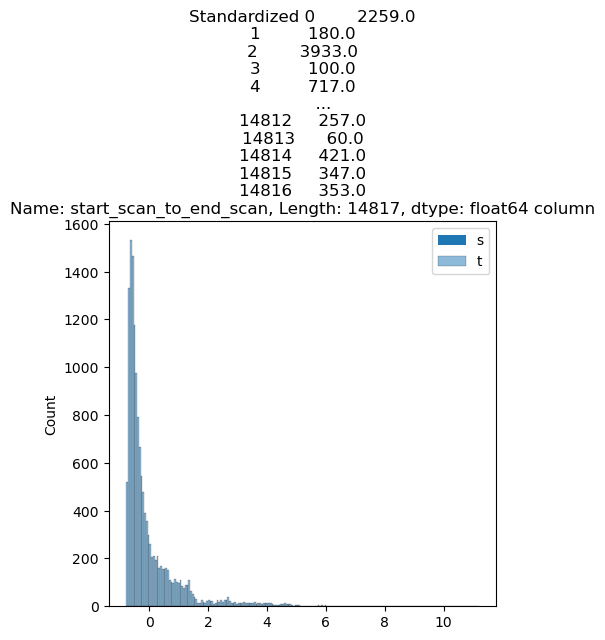

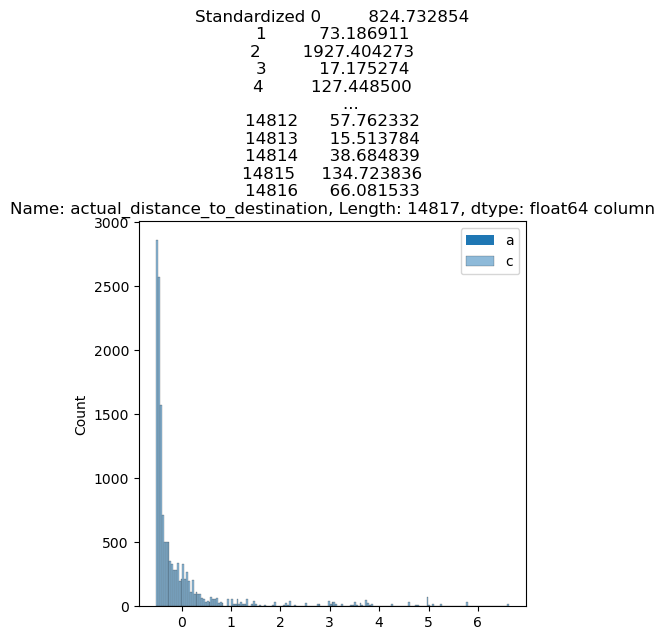

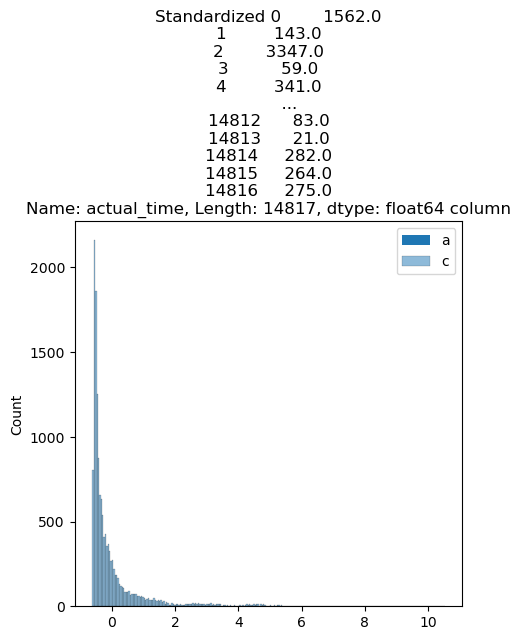

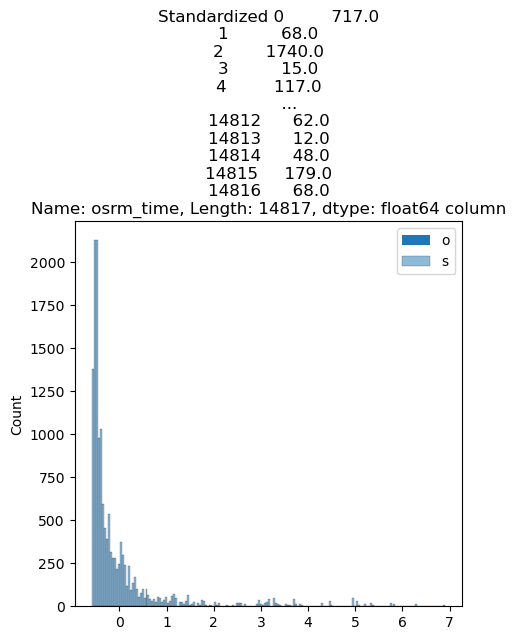

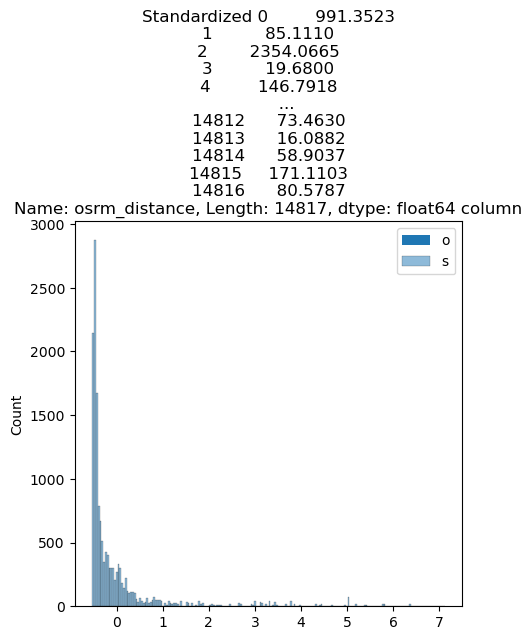

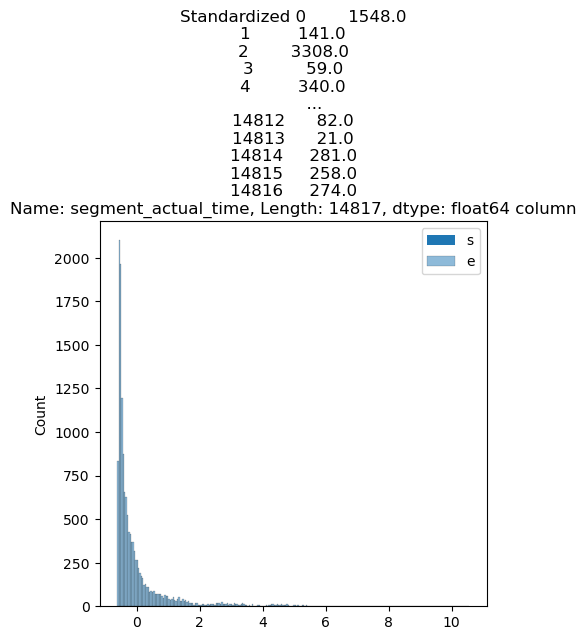

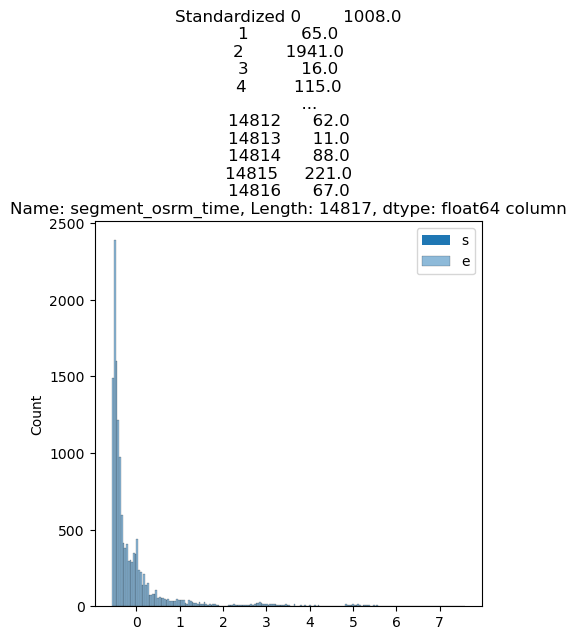

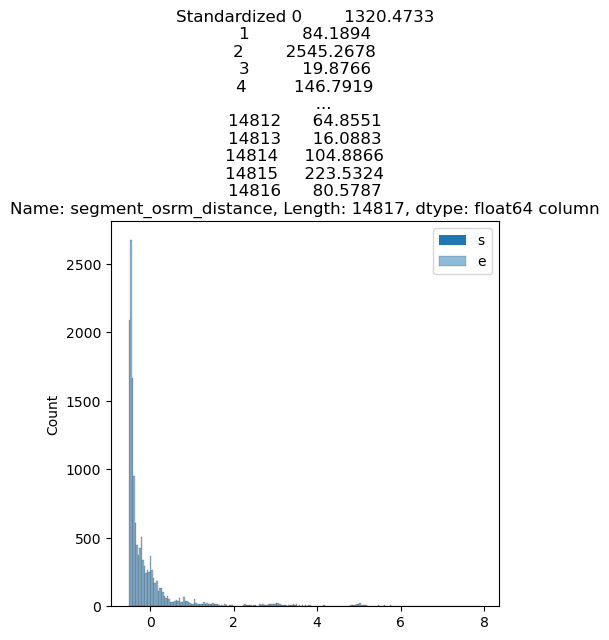

In [126]:
# Scaling all neccessary columns using loop

for i in scaling_columns:
    plt.figure(figsize = (5,5))
    scaler = StandardScaler()
    scaled = scaler.fit_transform(df2[i].to_numpy().reshape(-1, 1))
    sns.histplot(scaled)
    plt.title(f"Standardized {df2[i]} column")
    plt.legend(i)
    plt.plot()

## Business Insights

#### 1. The data is given from the period '2018-09-12 00:00:16' to '2018-10-08 03:00:24'.

#### 2. There are about 14817 unique trip IDs, 1508 unique source centers, 1481 unique destination_centers, 690 unique source cities, 806 unique destination cities.

#### 3. Most of the data is for testing than for training.

#### 4. Most common route type is Carting.

#### 5. The names of 14 unique location ids are missing in the data.

#### 6. The number of trips start increasing after the noon, becomes maximum at 10 P.M and then start decreasing.

#### 7. Maximum trips are created in the 38th week.

#### 8. Most orders come mid-month. That means customers usually make more orders in the mid of the month.

#### 9. Most orders are sourced from the states like Maharashtra, Karnataka, Haryana, Tamil Nadu, Telangana

#### 10. Maximum number of trips originated from Mumbai city followed by Gurgaon Delhi, Bengaluru and Bhiwandi. That means that the seller base is strong in these cities.

#### 11. Maximum number of trips ended in Maharashtra state followed by Karnataka, Haryana, Tamil Nadu and Uttar Pradesh. That means that the number of orders placed in these states is significantly high.

#### 12. Maximum number of trips ended in Mumbai city followed by Bengaluru, Gurgaon, Delhi and Chennai. That means that the number of orders placed in these cities is significantly high.

#### 13. Most orders in terms of destination are coming from cities like bengaluru, mumbai, gurgaon, bangalore, Delhi.

#### 14. Features start_scan_to_end_scan and od_total_time(created feature) are statistically similar.

#### 15. Features actual_time & osrm_time are statitically different.

#### 16. Features start_scan_to_end_scan and segment_actual_time are statistically similar.

#### 17. Features osrm_distance and segment_osrm_distance are statistically different from each other.

#### 18. Both the osrm_time & segment_osrm_time are not statistically same.

## Recommendations

#### 1. The OSRM trip planning system needs to be improved. Discrepancies need to be catered to for transporters, if the routing engine is configured for optimum results.

#### 2. osrm_time and actual_time are different. Team needs to make sure this difference is reduced, so that better delivery time prediction can be made and it becomes convenient for the customer to expect an accurate delivery time.

#### 3. The osrm distance and actual distance covered are also not same i.e. maybe the delivery person is not following the predefined route which may lead to late deliveries or the osrm devices is not properly predicting the route based on distance, traffic and other factors. Team needs to look into it.

#### 4. Most of the orders are coming from/reaching to states like Maharashtra, Karnataka, Haryana and Tamil Nadu. The existing corridors can be further enhanced to improve the penetration in these areas.

#### 5. Customer profiling of the customers belonging to the states Maharashtra, Karnataka, Haryana, Tamil Nadu and Uttar Pradesh has to be done to get to know why major orders are coming from these atates and to improve customers' buying and delivery experience.

#### 6. From state point of view, we might have very heavy traffic in certain states and bad terrain conditions in certain states. This will be a good indicator to plan and cater to demand during peak festival seasons.